# La viabilità: spese e fabbisogni nei comuni italiani


Quante volte il numero di buche incontrate su una strada viene utilizzato come indicatore per valutare l'operato di un sindaco? Sicuramente, il mantenimento della città assicurando ai cittadini delle infrastrutture funzionali e funzionanti, strade non dissestate richiede un impegno economico non banale. 


Tra le voci di bilancio di un comune italiano rientra quella di *viabilità*. Questa voce comprende, non solo i costi dell'asfalto per ricoprire le buche sulle strade, bensì anche tutti i costi relativi agli interventi infrastrutturali necessari per migliorare la mobilità urbana sia per le autovetture ed i motocicli sia per chi è più green ed opta per mezzi di trasporto come la bicicletta e le gambe. In più, sono incluse in questa voce le spese relative all'arredo urbano strumentale alla circolazione.


In questo approfondimento poniamo l'attenzione su un indicatore particolare fornito dai dati OpenCivitas: la *differenza percentuale tra spesa storiaca e fabbisogni standard* rispetto ai fabbisogni dei comuni italiani, con riferimento alla spesa ed al fabbisogno relativi alla viabilità. La variabile verrà confrontata con quelche altro inficatore con lo scopo di studiare le caratteristiche dei comuni la cui differenza tra spesa storica e fabbisogni standard è definita secondo le seguenti fasce:

* __Fascia 2__: La differenza percentuale è maggiore di 100, il che descrive che la spesa è almeno due volte i fabbisogni del comune.
* __Fascia 1__: La differenza percentuale è compresa tra 25 e 100, quindi la spesa è tra una e due volte più grande dei fabbisogni.
* __Fascia 0__: La differenza perdentuale è compresa tra -25 e 25, quindi la spesa è di poco più grande o più piccola dei fabbisogni standard.
* __Fascia -1__: La differenza percentuale è compresa tra -25 e -50, quindi i fabbisogni sono tra una e due volte più grande della spesa.
* __Fascia -2__: La differenza percentuale è compresa tra -50 e -100, il che descrive che i fabbisogni sono almeno due volte la spesa del comune.


__Nota:__ In questo documento potrete trovare le procedure che portano ad i risultati cosicchè possiate autonomamente riprodurle nel momento i cui i dati saranno aggiornati agli anni successivi al 2013.


### Indice
1. [Anno 2010](#2010)    
    1. [Spesa pro-capite: top-10 e bottom-10 dei comuni italiani](#par1.1)    
    2. [Differenza percentuale tra spesa storica e fabbisogno standard](#par1.2)     
    3. [Differenza spesa e fabbisogno a confronto con la differenza tra servizi offerti e servizi standard](#par1.3)    
    4. [Caratteristiche di reddito dei comuni appartenenti a diverse fasce](#par1.4)

2. [Anno 2013](#2013)     
    1. [Spesa pro-capite: top-10 e bottom-10 dei comuni italiani](#par2.1)
    2. [Differenza percentuale tra spesa storica e fabbisogno standard](#par2.2)
    3. [Differenza spesa e fabbisogno a confronto con la differenza tra servizi offerti e servizi standard](#par2.3)    
    4. [Caratteristiche di reddito dei comuni appartenenti a diverse fasce](#par2.4)

3. [Confronto anni 2010-2013](#vs)
    1. [Confronto top e bottom spesa pro-capite](#vs3.1)
    2. [Differenza percentuale tra spesa storica e fabbisogno standard](#vs3.2)
    3. [Confronto differenza spesa e fabbisogno a confronto con la differenza tra servizi offerti e servizi standard](#vs3.3)
    4. [Confronto caratteristiche di reddito dei comuni appartenenti a diverse fasce](#vs3.4)

## Anno 2010 <a name="#2010"></a>

In questa sezione tutte le analisi svolte saranno relative all'anno 2010.

In [113]:
# Importare librerie utili all'analisi
import math
import numpy as np
import pandas as pd
#import seaborn as sns
#sns.set(color_codes=True)
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
from collections import defaultdict

* Importare dati per svolgere l'analisi:
    - __Dataset 1__: `Open Civitas` fabbisogni comuni 2010.
    - __Dataset 2__: `Anagrafica dei comuni`, 2010.

In [114]:
# Importare dataset 1 e selezionare i dati relativi al 2010
df_integrato = pd.read_csv('opencivitas-spesa-storica+dati-irpef.csv', sep = ',')
df_integrato_2010 = df_integrato[df_integrato['ANNO']==2010]

# Importare dataset 2 
df_2010 = pd.read_csv('FC04A_funz_viabilita2010.csv', sep = ',')[['Anno', 'Codice_Nazionale', 'Codice_Istat',
       'Denominazione Italiana', 'Provincia', 'Sigla Provincia',
       'Codice_Provincia', 'Regione', 'Sigla Regione', 'Codice_Regione',
       'AreaGeo', 'CAT_DET_COD_1', 'CAT_DET_COD_2', 'CAT_DET_COD_3',
       'CAT_DET_COD_4', 'CAT_DET_COD_5', 'CAT_DET_COD_6', 'CAT_DET_COD_7',
       'COEFF_TEORICO', 'IND1', 'IND3', 'IND4', 'IND5', 'IND6', 'IND7', 'IND8',
       'IND9', 'IND10', 'LQP_COD_1', 'LQP_COD_2', 'LQP_COD_3', 'LQP_COD_4',
       'LQP_COD_5', 'LQP_COD_6', 'LQP_COD_S']]

* Otteniamo una vista sul Dataset 1

In [115]:
df_integrato_2010.head(3)

,ANNO,COMUNE_CAT_COD,SPESA_CCC_FC01A,TOT_SPESA_CCC_FC01A,SPESA_CCC_FC01B,TOT_SPESA_CCC_FC01B,SPESA_CCC_FC01C,TOT_SPESA_CCC_FC01C,SPESA_CCC_FC01D,TOT_SPESA_CCC_FC01D,...,Reddito imponibile addizionale - Frequenza,Reddito imponibile addizionale IRPEF - Ammontare,Reddito imponibile addizionale IRPEF - Frequenza,Reddito spettanza imprenditore ordinaria (compresi nulli) - Ammontare,Reddito spettanza imprenditore ordinaria (compresi nulli) - Frequenza,Reddito spettanza imprenditore semplificata (compresi nulli) - Ammontare,Reddito spettanza imprenditore semplificata (compresi nulli) - Frequenza,Regione,Sigla Provincia_y,tot_abitanti_tasse
0,2010,A001,128832.900000,4.971702e+08,706678.700000,1.024500e+09,210454.3,551023543.0,2160820.2,6.386494e+09,...,NaN,288473057.0,11377.0,NaN,NaN,NaN,NaN,VENETO,PD,14102.0
1,2010,A004,48.290741,4.971702e+08,3022.240741,1.024500e+09,54.6,551023543.0,110355.7,6.386494e+09,...,NaN,3396780.0,170.0,NaN,NaN,NaN,NaN,LOMBARDIA,LO,207.0
2,2010,A005,50458.800000,4.971702e+08,143147.200000,1.024500e+09,59466.4,551023543.0,359500.4,6.386494e+09,...,NaN,49890297.0,2035.0,NaN,NaN,NaN,NaN,LOMBARDIA,LC,2438.0


* Otteniamo una vista sul Dataset 2

In [116]:
df_2010.head(3)

,Anno,Codice_Nazionale,Codice_Istat,Denominazione Italiana,Provincia,Sigla Provincia,Codice_Provincia,Regione,Sigla Regione,Codice_Regione,...,IND8,IND9,IND10,LQP_COD_1,LQP_COD_2,LQP_COD_3,LQP_COD_4,LQP_COD_5,LQP_COD_6,LQP_COD_S
0,2010,A052,6001.0,Acqui Terme,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,0.589474,30.0,3.260023,39.823718,-24.516654,0.0,0.0,8.0,3.0,3.0
1,2010,A146,6002.0,Albera Ligure,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,0.000000,0.0,6.191950,86.235965,-19.242343,0.0,0.0,10.0,4.0,2.8
2,2010,A182,6003.0,Alessandria,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,0.000000,5.0,6.538632,-73.740234,-27.195587,0.0,1.0,1.0,3.0,5.8


* Quindi uniamo le informazioni contenute nei due dataset utilizzando come elemento comune il `Codice nazionale` di ogni comune, e mostriamo una vista del dataset ottenuto.

In [117]:
df = pd.merge(df_2010,  df_integrato_2010, right_on = 'COMUNE_CAT_COD', left_on = 'Codice_Nazionale', how = 'left')

df.head(3)

,Anno,Codice_Nazionale,Codice_Istat,Denominazione Italiana_x,Provincia,Sigla Provincia,Codice_Provincia,Regione_x,Sigla Regione,Codice_Regione,...,Reddito imponibile addizionale - Frequenza,Reddito imponibile addizionale IRPEF - Ammontare,Reddito imponibile addizionale IRPEF - Frequenza,Reddito spettanza imprenditore ordinaria (compresi nulli) - Ammontare,Reddito spettanza imprenditore ordinaria (compresi nulli) - Frequenza,Reddito spettanza imprenditore semplificata (compresi nulli) - Ammontare,Reddito spettanza imprenditore semplificata (compresi nulli) - Frequenza,Regione_y,Sigla Provincia_y,tot_abitanti_tasse
0,2010,A052,6001.0,Acqui Terme,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,NaN,2.671122e+08,11792.0,NaN,NaN,NaN,NaN,PIEMONTE,AL,15071.0
1,2010,A146,6002.0,Albera Ligure,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,NaN,3.641624e+06,200.0,NaN,NaN,NaN,NaN,PIEMONTE,AL,267.0
2,2010,A182,6003.0,Alessandria,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,NaN,1.313600e+09,55344.0,NaN,NaN,NaN,NaN,PIEMONTE,AL,68749.0


* Effettuiamo un controllo sul numero di comuni che non sono in entrambi i dataset e di cui, necessariamente abbiamo perso le informazioni unendo i due dataset.

In [118]:
print ("Nel passaggio precedente abbiamo perso le informazioni relative a ", sum(df['Regione_y'].isnull()==True)/len(df['Codice_Nazionale'].unique())*100 , "% dei comuni. Vista la bassa percentuale proseguiamo l'analisi.")

Nel passaggio precedente abbiamo perso le informazioni relative a  0.134288272158 % dei comuni. Vista la bassa percentuale proseguiamo l'analisi.


### 1.1. Spesa pro-capite: top-10 e bottom-10 delle province italiane <a name="#par1.1"></a>

Per avere un'idea di quanto sia la spesa procapite nei comuni d'Italia, presentiamo la classifica dei 10 comuni che spendono di più e dei 10 che spendono di meno.

Prima di selezionare i comuni prendiamo in considerazione la distribuzione dell'indicatore che indica la spesa del comune pero-capite per la viabilità.

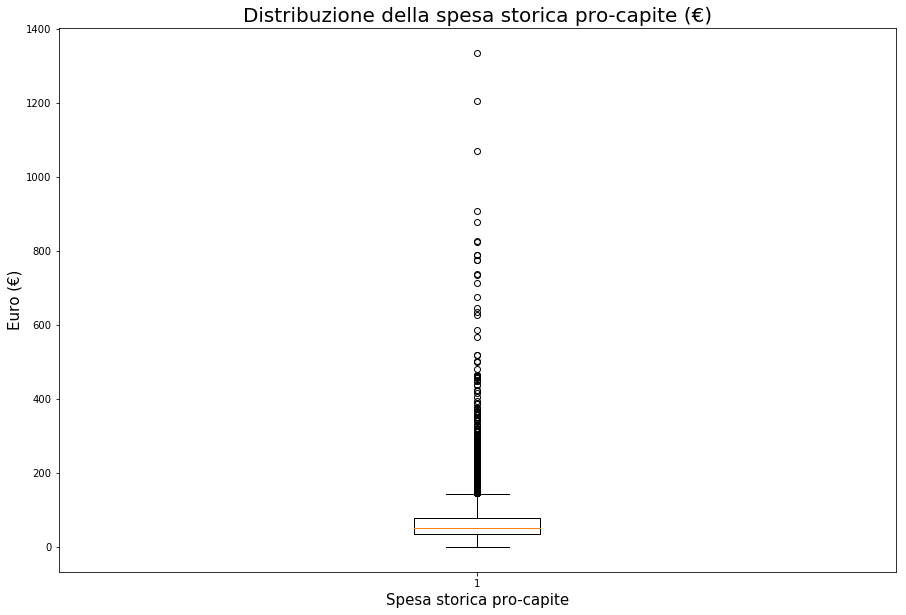

In [119]:
# Non consideriamo i valori nulli
distr_ = [i for i in df['IND1'] if math.isnan(i)==False]

# Creiamo un plot che ci mostri la distribuzione dell'indicatore sui comuni
plt.figure(figsize=(15,10))
plt.boxplot(np.array(distr_))
plt.title('Distribuzione della spesa storica pro-capite (€)', fontsize = 20)
plt.xlabel('Spesa storica pro-capite', fontsize = 15)
plt.ylabel('Euro (€)', fontsize = 15)

Dal grafico osserviamo che ci sono tanti valori fuori dal box e dalla differenza interquartilica. Questi valori sono definiti outliers. Essendo  i valori assunti un po' irragionevoli (troppo elevati) li eliminiamo dalla nostra analisi di spesa procapite. Inpiù, decidiamo di rimuovere quei comuni che registrano come valore 0. 

__In generale__ sarebbe interessante studiare i comuni che risultano essere outliers e che registrano una spesa procapite pari a zero. Non ci soffermiamo du questo punto in quanto non obiettivo dell'analisi.

<a name='procapite2010'></a>

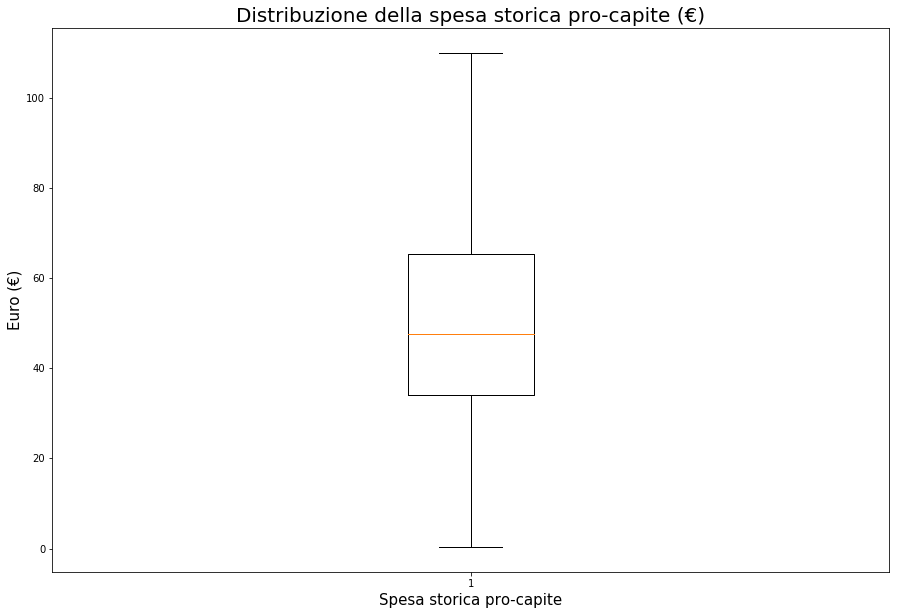

In [120]:
# Non consideriamo i valori nulli
distr_ = [i for i in df['IND1'] if math.isnan(i)==False and i < 110 and i > 0]

# Creiamo un plot che ci mostri la distribuzione dell'indicatore sui comuni
plt.figure(figsize=(15,10))
plt.boxplot(np.array(distr_))
plt.title('Distribuzione della spesa storica pro-capite (€)', fontsize = 20)
plt.xlabel('Spesa storica pro-capite', fontsize = 15)
plt.ylabel('Euro (€)', fontsize = 15)

Quindi, nel 50% dei comuni la spesa pro-capite dei comuni italiani è compresa tra 0 e ~50 euro. Mentre solo il 25% dei comuni spende più di ~70 euro per cittadino.

### Bottom 10

I comuni italiani con la spesa pro-capite (superiore a zero) per la viabilità sono i seguenti. 

La spesa oscilla tra i 30 centesimi di Diano Aretino, un paese ligure con meno di 700 abitanti, dove si suppone che viste le dimension del comune la spesa per la viabilità sia molto ridotta, fino ai poco più di 3 euro di Marano di Napoli, che nonostante sia una dei comuni più popolosi nella zona metropolitana di Napoli registra un valore di molto inferiore alla mediana nazionale. 

In [121]:
# Ottieni la lista dei comuni
df[['Denominazione Italiana_x', 'IND1', 'Regione_x', 'AreaGeo']][(df['IND1'] > 0) & (df['IND1']<110)].sort_values('IND1')[:10]

,Denominazione Italiana_x,IND1,Regione_x,AreaGeo
2937,Diano Arentino,0.316240,Liguria,Nord-ovest
3459,Arese,0.526802,Lombardia,Nord-ovest
1439,Pisogne,0.825632,Lombardia,Nord-ovest
3934,Galliate,2.204568,Piemonte,Nord-ovest
3912,Briona,2.204568,Piemonte,Nord-ovest
1662,San Gregorio Matese,2.231237,Campania,Sud
3568,Noviglio,2.233495,Lombardia,Nord-ovest
3719,Cavezzo,2.733093,Emilia-Romagna,Nord-est
2649,Mattinata,2.946821,Puglia,Sud
3846,Marano di Napoli,3.037104,Campania,Sud


### Top 10

Evidenziamo quindi i comuni con la spesa pro-capite più elevata.

Tutti i comuni eccetto Badia Tedalda e Santa Cristina d'Aspromonte si trovano nel Nord Italia. Viste le dimensioni del comune calabro, questo ammontare di spesa risulta senz'altro eccessivo. 


In generale, tutti i paesi in lista registrano una popolazione bassa. Come minimo ci aspettiamo delle strade perfette nei loro dintorni!

In [122]:
# Ottieni la lista dei comuni
df[['Denominazione Italiana_x', 'IND1', 'Regione_x','Provincia' ,'AreaGeo']][(df['IND1'] > 0) & (df['IND1']<110)].sort_values('IND1')[-10:]

,Denominazione Italiana_x,IND1,Regione_x,Provincia,AreaGeo
183,Villamiroglio,109.405325,Piemonte,Alessandria,Nord-ovest
4290,Bardi,109.461430,Emilia-Romagna,Parma,Nord-est
2181,Rodero,109.592801,Lombardia,Como,Nord-ovest
4810,Santa Cristina d'Aspromonte,109.756513,Calabria,Reggio di Calabria,Sud
1042,Sala Biellese,109.792664,Piemonte,Biella,Nord-ovest
5756,Novalesa,109.816454,Piemonte,Torino,Nord-ovest
2929,Cervo,109.833333,Liguria,Imperia,Nord-ovest
2947,Molini di Triora,109.908602,Liguria,Imperia,Nord-ovest
760,Azzone,109.933638,Lombardia,Bergamo,Nord-ovest
422,Badia Tedalda,109.991056,Toscana,Arezzo,Centro


### 1.2. Differenza percentuale tra spesa storica e fabbisogno standard  <a name='par1.2'></a>

Proseguiamo quindi ponendo la nostra attenzione su la differenza percentuale tra la spesa storica ed il fabbisogno standard dei comuni italiani. In particolare, ad ogni comune mettiamo una label che specifica a quale fascia il comune appartiene.

* __Fascia 2__: La differenza percentuale è maggiore di 100, il che descrive che la spesa è almeno due volte i fabbisogni del comune.
* __Fascia 1__: La differenza percentuale è compresa tra 25 e 100, quindi la spesa è tra una e due volte più grande dei fabbisogni.
* __Fascia 0__: La differenza perdentuale è compresa tra -25 e 25, quindi la spesa è di poco più grande o più piccola dei fabbisogni standard.
* __Fascia -1__: La differenza percentuale è compresa tra -25 e -50, quindi i fabbisogni sono tra una e due volte più grande della spesa.
* __Fascia -2__: La differenza percentuale è compresa tra -50 e -100, il che descrive che i fabbisogni sono almeno due volte la spesa del comune.

Le fasce sono state definite tenenendo in considerazione le distribuzioni della differenza percentuale dei comuni di ogni regione. Per ognuna, infatti, si osserva che non considerando le code delle distribuzioni (outliers > 100%) i valori della differenza percentuale sono più o meno simmetrici rispetto al valore centrale.

In [123]:
# Definiamo la funzione che creerà le labels per i comuni
def fasce(x):
    if  200>x >= 100 :
        return ("fascia_2")
    elif 25<x<100:
        return ("fascia_1")
    elif -25<=x<=25:
        return ("fascia_0")
    elif -25<x<-50:
        return ("fascia_meno_1")
    elif -100<=x<=-50:
        return ("fascia_meno_2")
    
    
# Quindi creiamo le labels
df['fasce'] = df.LQP_COD_1.apply(fasce)

* Come prima cosa studiamo quanti sono i comuni che appartendono all'una o all'altra fascia.

In [124]:
df_20100 = df['fasce'].value_counts()/sum(df['fasce'].value_counts())*100
df_20100

fascia_0         53.820919
fascia_1         31.416442
fascia_meno_2     9.532999
fascia_2          5.229641
Name: fasce, dtype: float64

- Il __53%__ dei comuni italiani appartiene alla fascia zero. Possiamo quindi dire che in circa la metà dei comuni la differenza percentuale tra la spesa storica ed i fabbisogni è, in valore assoluto, non superiore al 25%, che vede ancora uno squilibrio tra spesa e fabbisogni, ma meno grave di quella che si osserva nelle altre fasce.

- Nel __30%__ dei comuni italiani la spesa eccede i fabbisogni tra 25% ed il 100%. Quindi, in dei casi si avvicina a raddoppiare i fabbisogni standard.

- __9%__ dei comuni registrano una spesa storica che può essere due volte *inferiore* ai fabbisogni.

- Infine, il __6%__ spende storicamente più di due volte i fabbisogni standard.


Visualizziamo come i comuni di ogni regione, presente nel dataset - 15 regioni-, si distribuiscono sulle fasce.

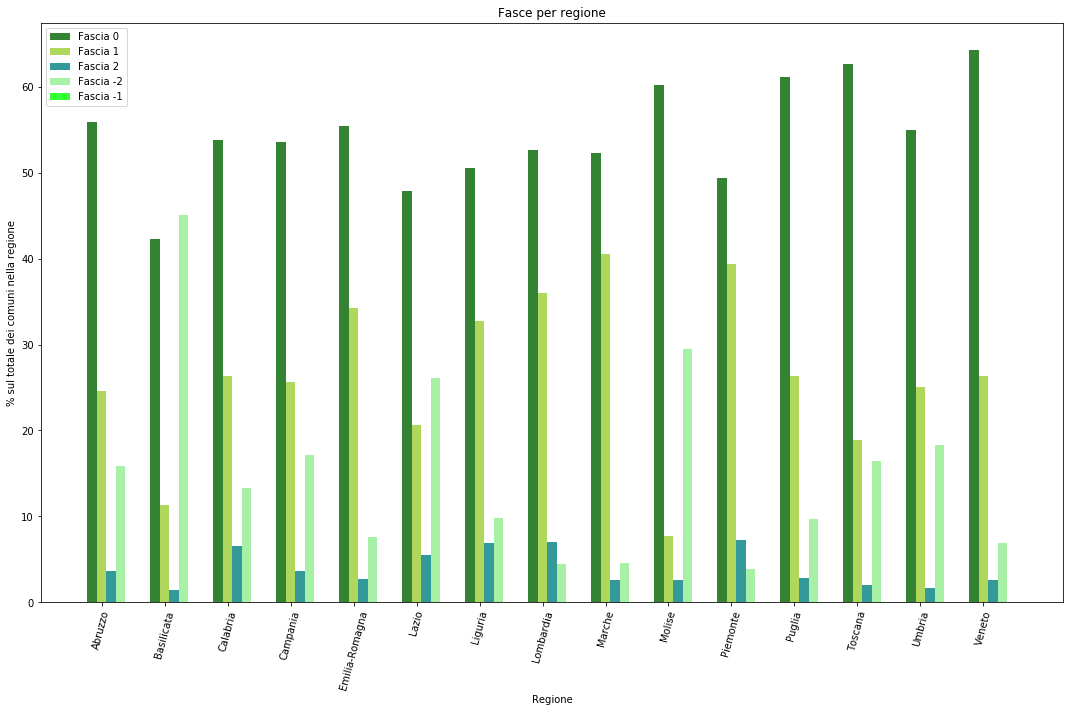

In [125]:
# Creare il grafico
voter_tab = pd.crosstab(df['fasce'], df['Regione_x'], margins = True).iloc[:,:15]
voter_tab = voter_tab/voter_tab.loc['All']*100

n_groups = 15
fascia_0 = voter_tab.loc['fascia_0']
fascia_1 = voter_tab.loc['fascia_1']#[i for i,j in list_fasce['fascia_1']]
fascia_2 = voter_tab.loc['fascia_2']#[i for i,j in list_fasce['fascia_2']]
fascia_meno_1 = [0]*n_groups
fascia_meno_2 = voter_tab.loc['fascia_meno_2']#[i for i,j in list_fasce['fascia_meno_2']]
 
# create plot
plt.figure(figsize=(15,10))
fig, ax = plt.subplots(figsize=(15,10))
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8
 
rects1 = plt.bar(index, fascia_0, bar_width,
                 alpha=opacity,
                 color='darkgreen',
                 label='Fascia 0')
 
rects2 = plt.bar(index + bar_width, fascia_1, bar_width,
                 alpha=opacity,
                 color='yellowgreen',
                 label='Fascia 1')

rects2 = plt.bar(index + 2*(bar_width), fascia_2, bar_width,
                 alpha=opacity,
                 color='teal',
                 label='Fascia 2')

rects2 = plt.bar(index + 3*(bar_width), fascia_meno_2, bar_width,
                 alpha=opacity,
                 color='lightgreen',
                 label='Fascia -2')

rects2 = plt.bar(index + 4*(bar_width), fascia_meno_1, bar_width,
                 alpha=opacity,
                 color='lime',
                 label='Fascia -1')
 

 
plt.xlabel('Regione')
plt.ylabel('% sul totale dei comuni nella regione')
plt.title('Fasce per regione')
plt.xticks(index + bar_width, voter_tab.columns, rotation =75)
plt.legend()
 
plt.tight_layout()
plt.show()

Osserviamo come le regioni dell'area Sud/Centro della penisola:
* `Abruzzo, Basilicata, Calabria, Campania, Lazio , Molise, Toscana ed Umbria`, registrano che più del 10% dei loro comuni appartiane alla fascia -2, dove i fabbisogni eccedono la spesa di almeno due volte. 

* `Basilicata, Lazio e Molise` sono le tre regioni che hanno più paesi appartenenti alla fascia meno due che quelli appartenenti alla fascia 1. Il che sta a significare che la spesa che i comuni registrano per la viabilità non è sufficiente a soddisfare quanto riportato nei fabbisogni standard.

La presenza di queste caratteristiche tra Nord e resto dell'Italia è confermata dal fatto che le due variabili categoriche (`Regioni`, `Fasce`) risultano avere un'associazione statistica. Infatti, il test Chi-quadro per l'indipendenza statistica delle variabili, afferma che le due non lo sono. A seguire è riportato il test:

$H_0$: Variabile  `Regione` and variabile `Fasce` sono indipendenti.

$H_a$:  Variabile  `Regione` and variabile `Fasce` sono indipendenti

L'ipotesi alternativa è che sapere il livello della variabile `Regione` può aiutare a predire il livelli della variabile `Fasce`. 

In ogni caso, è __importante__ notare che se l'ipotesi nulla viene rifiutata, il test suggerisce solo la presenza di relazione statistica tra le variabili, che non deve necessariamente essere causale.

In [126]:
# Definizione della tabella delle contingenze
voter_tab = pd.crosstab(df['fasce'], df['Regione_x'], margins = True)
observed = voter_tab.iloc[0:5,0:55]


# Tabella dei valori attesi
expected =  np.outer(voter_tab["All"][0:5],
                     voter_tab.loc["All"][0:15]) / 5221

expected = pd.DataFrame(expected)

expected.columns = voter_tab.columns[0:15]
expected.index = ['fascia_0', 'fascia_1', 'fascia_2', 'fascia_meno_1', 'fascia_meno_2']


# Definire il valore della statistica test
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print("Il valore della statistica test è: ", chi_squared_stat)


crit = stats.chi2.ppf(q = 0.95, # Trovare il valore critico per 1-alpha(=.95) livello di confidenza*
                      df = 56)  #Il numero di gradi di liberta è pari  al numero livelli var 1 -1 moltiplicato
                                # numero livalli var 2 - 1 *

print("Valore critico: ", crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=56)
print("P value: ", p_value)

Il valore della statistica test è:  4378.353995999349
Valore critico:  74.4683241593
P value:  0.0


Conseguentemente, essendo il *p-value* uguale a 0 l'iposesi di indipendenza tra le variabili (nulla) è rifiutata.

### 1.3. Differenza spesa e fabbisogno a confronto con la differenza tra servizi storici e servizi standard <a name='par1.3'></a>

Ci soffermiamo sulla variabile `Differenza tra livello dei servizi storico e livello dei servizi standard, rispetto al livello dei servizi standard`. Pertanto, per questa variabile, se confrontata con la `differenza tra spesa storica e fabbisogno standard`, ci aspettiamo che per i comuni in cui la spesa supera consistentemente i fabbisogni, il valore della differenza tra i servizi sia positivo. 

Essendo la nuava variabile continua, anche in questo caso decidiamo di dividere la differenza in fasce.

In [127]:
# Quindi creiamo le labels
df['scaglioni_servizi'] = df.LQP_COD_2.apply(fasce)

Diamo un'occhiata a come i comuni si distribuiscono sulle fasce create. 

In [128]:
df['scaglioni_servizi'].value_counts()/sum(df['scaglioni_servizi'].value_counts())*100

fascia_0         62.343277
fascia_1         23.584090
fascia_meno_2     8.646779
fascia_2          5.425854
Name: scaglioni_servizi, dtype: float64

La maggior parte dei comuni mostrano un equilibro tra servizi storici e servizi standard. 

Poniamo l'attenzione sull'identificazione di alcune classi di comuni per poi studiarne le caratteristiche in termini di reddito.

In generale, non siamo contenti se osserviamo l'esistenza di comuni la cui spesa è superiore al fabbisogno ma i servizi offerti sono al di sotto degli standard. Infatti, questo protebbe essere un indicatore di "spreco", poichè sembrerebbe che la spesa elevata non necessariamente corrisponde ad un ottimo livello di servizi rispetto lo standard. Quindi poniamo l'attenzione su questa classe di comuni.

In [129]:
def non_buono(x):
    #print (x)
    #print ('+'*20)
    if (100>x['LQP_COD_1']>25)  and (-100<x['LQP_COD_2']<-25):
        return 'NON BUONO'
    else:
        return 'ALTRO'

* Creiamo quindi la nuova variabile

In [130]:
# Creare la nuova variabile
df['etichetta_non_buono'] = df.apply(non_buono, axis=1)

* Cerchiamo di capire dove sono collocati, in termini di regioni, questi comuni e rispetto al totale dei comuni della regione quale percentuale rappresentano. <a name='confronto.3_10'></a>

In [131]:
pre_pro = pd.crosstab(df['etichetta_non_buono'], df['Regione_x'], margins = True).iloc[:,:15]

to_plot = (pre_pro/pre_pro.loc['All']*100).loc['NON BUONO']

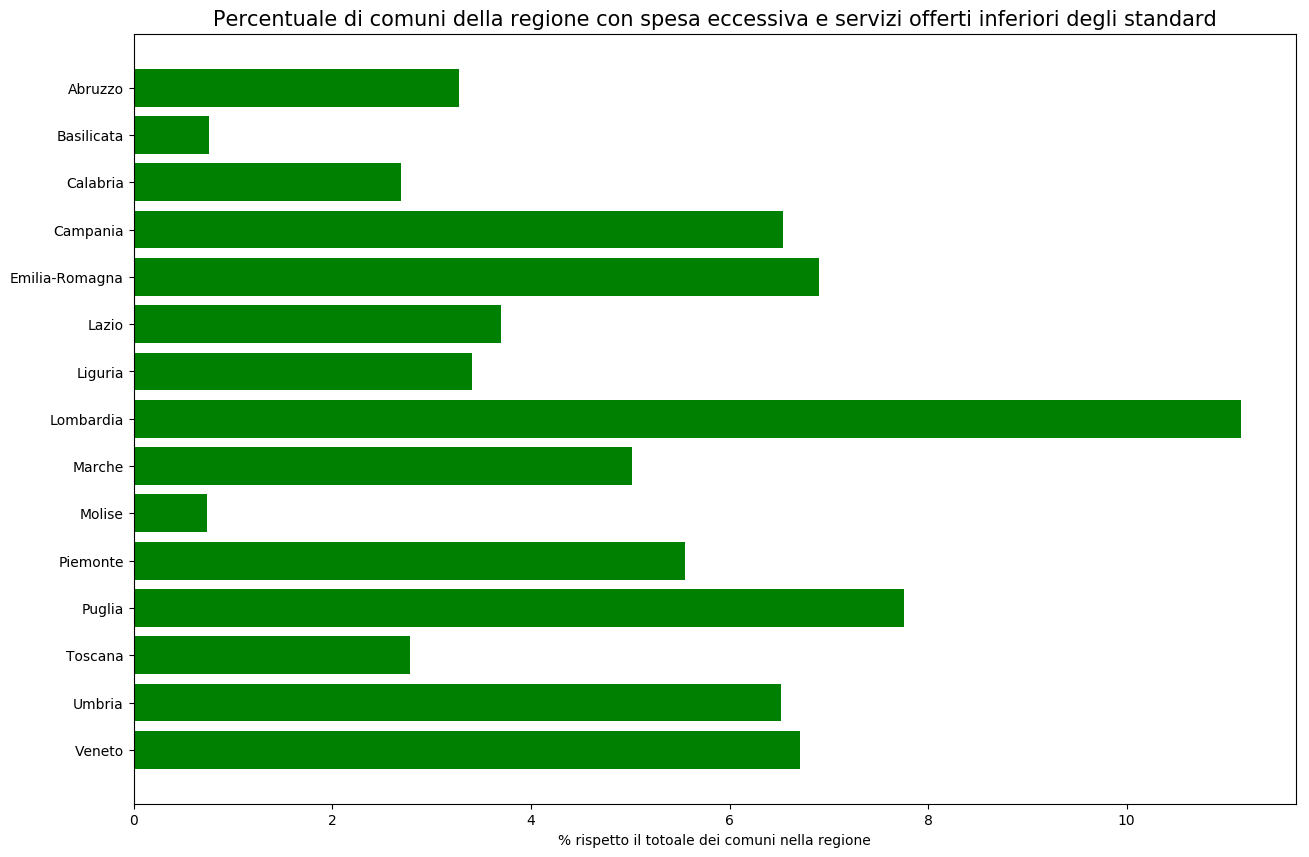

In [132]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15,10))

# Example data
regioni = list(to_plot.index)
y_pos = np.arange(len(regioni))
performance = to_plot

ax.barh(y_pos, performance, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(regioni)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('% rispetto il totoale dei comuni nella regione')
ax.set_title('Percentuale di comuni della regione con spesa eccessiva e servizi offerti inferiori degli standard', fontsize =15)

plt.show()

Tra le regioni con percentuale superiore al 5%, la metà è situata a Nord Italia ed il restante tra Centro e Sud. Ciò ci conferma che certe anomalie, quindi presenze di sprechi nei comuni, non sono presinti solo al Centro o al Sud. Bensì una consistente fetta di comuni che mostrano questi squilibri si trova nella parte settentrionale della penisola.

La `Basilicata` ed il `Molise` mostrano le percentuali più basse. Infatti se torniamo alla [precedente analisi](#par1.2), vediamo che entrambe sono regioni che hanno un'alta percentuale di comuni la cui spesa è consistentemente inferiore al fabbisogno.

Ripetiamo la stessa analisi per osservare la distribuzione dei comuni che mantengono un equilibrio tra spesa e fabbisogni e servizi offerti e servizi standard.

<a name='confronto.3_10_'></a>

In [133]:
def molto_buono(x):
    #print (x)
    #print ('+'*20)
    if  (x['LQP_COD_1']<25) & (x['LQP_COD_1']>-25)  & (x['IND4']<25) &(x['IND4']>-25):
        return 'molto BUONO'
    else:
        return 'ALTRO'

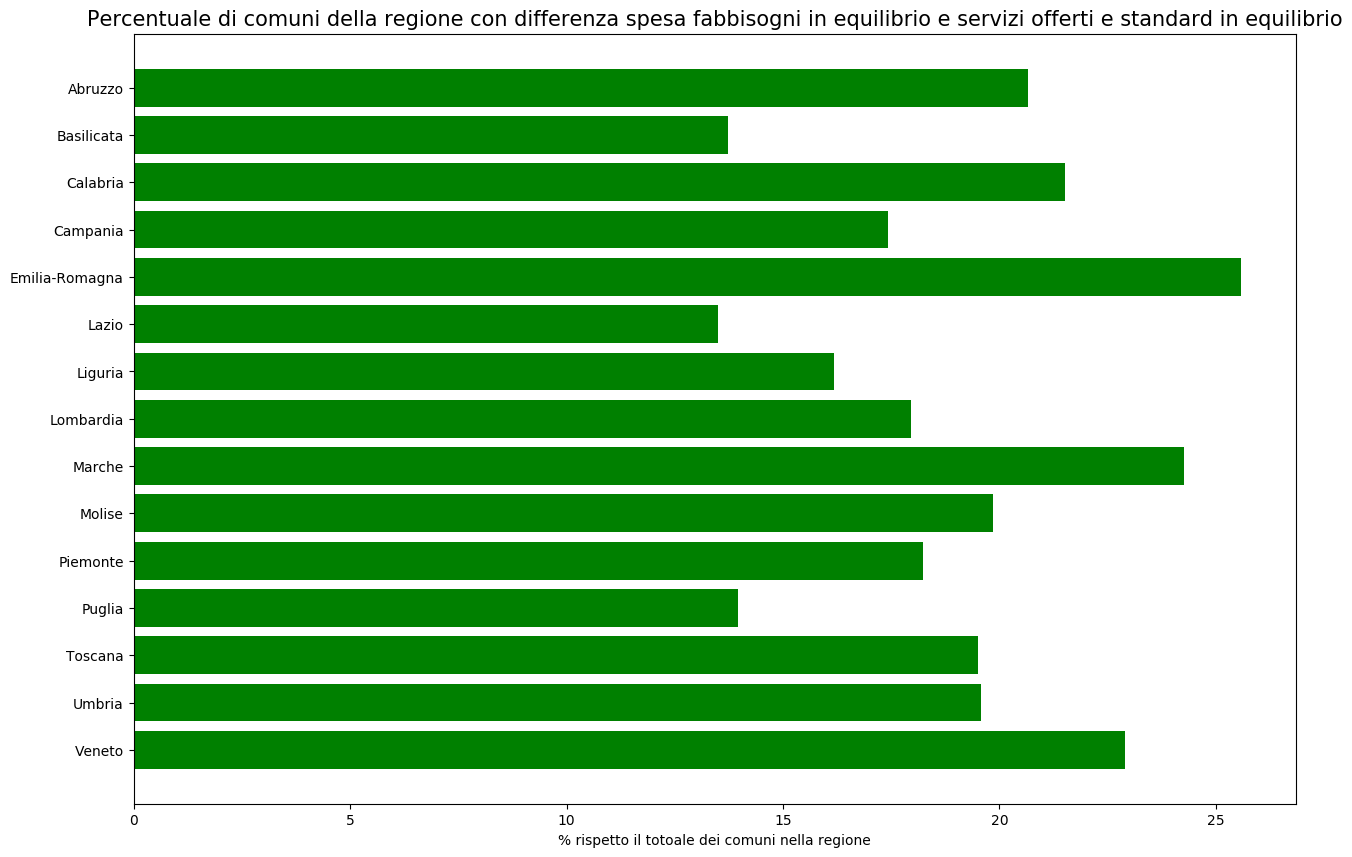

In [134]:
# Creare la nuova variabile
df['etichetta_nolto_buono'] = df.apply(molto_buono, axis=1)

pre_pro = pd.crosstab(df['etichetta_nolto_buono'], df['Regione_x'], margins = True).iloc[:,:15]

to_plot = (pre_pro/pre_pro.loc['All']*100).loc['molto BUONO']



plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15,10))

# Example data
regioni = list(to_plot.index)
y_pos = np.arange(len(regioni))
performance = to_plot

ax.barh(y_pos, performance, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(regioni)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('% rispetto il totoale dei comuni nella regione')
ax.set_title('Percentuale di comuni della regione con differenza spesa fabbisogni in equilibrio e servizi offerti e standard in equilibrio', fontsize =15)

plt.show()

`Basilicata`, `Lazio` e `Puglia` sono le tre regioni con le inferiori percentuali di comuni in "equilibrio" rispetto al resto delle regioni. 

### 1.4. Caratteristiche di reddito dei comuni appartenenti a diverse fasce <a name='par1.4'></a>

In questa sezione cerchiamo di capire le caratteristiche di reddito dei comuni appartenenti alle diverse fasce. In particolar modo, scegliamo di mostrare le distribuzioni di reddito, a seconda della fascia, per tutte le regioni.

In [135]:
# Redditi e tasse
df['Reddito totale frequenze'] = df['Reddito complessivo da 0 a 10000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 10000 a 15000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 15000 a 26000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 26000 a 55000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 55000 a 75000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 75000 a 120000 euro - Frequenza'].fillna(0) + df['Reddito complessivo minore o uguale a zero euro - Frequenza'].fillna(0) + df['Reddito complessivo oltre 120000 euro - Frequenza'].fillna(0) 

# Aggiustare i dati per i plot
fasce = ['fascia_0','fascia_1', 'fascia_2', 'fascia_meno_1', 'fascia_meno_2']

dictionary_fasce = {}
for f in fasce: 
    df_fascia_0 = df[df['fasce'] == f]

    # Ottenere totale frequenze redditi nelle varie regioni
    totale_fascia = df_fascia_0[['Reddito totale frequenze', 'Regione_x']].groupby('Regione_x').sum()['Reddito totale frequenze']

    # Ottenere frequenze sulle diverse fasce di reddito nelle diverse regioni
    redditi_regioni = df_fascia_0[['Reddito complessivo da 0 a 10000 euro - Frequenza', 'Reddito complessivo da 10000 a 15000 euro - Frequenza','Reddito complessivo da 15000 a 26000 euro - Frequenza','Reddito complessivo da 26000 a 55000 euro - Frequenza','Reddito complessivo da 55000 a 75000 euro - Frequenza','Reddito complessivo da 75000 a 120000 euro - Frequenza', 'Reddito complessivo minore o uguale a zero euro - Frequenza', 'Reddito complessivo oltre 120000 euro - Frequenza', 'Regione_x']].groupby('Regione_x').sum()#.describe()

    # Matrice di dati da plottare
    to_plot = redditi_regioni.div(totale_fascia, axis=0)*100
    
    dictionary_fasce[f] = to_plot




(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

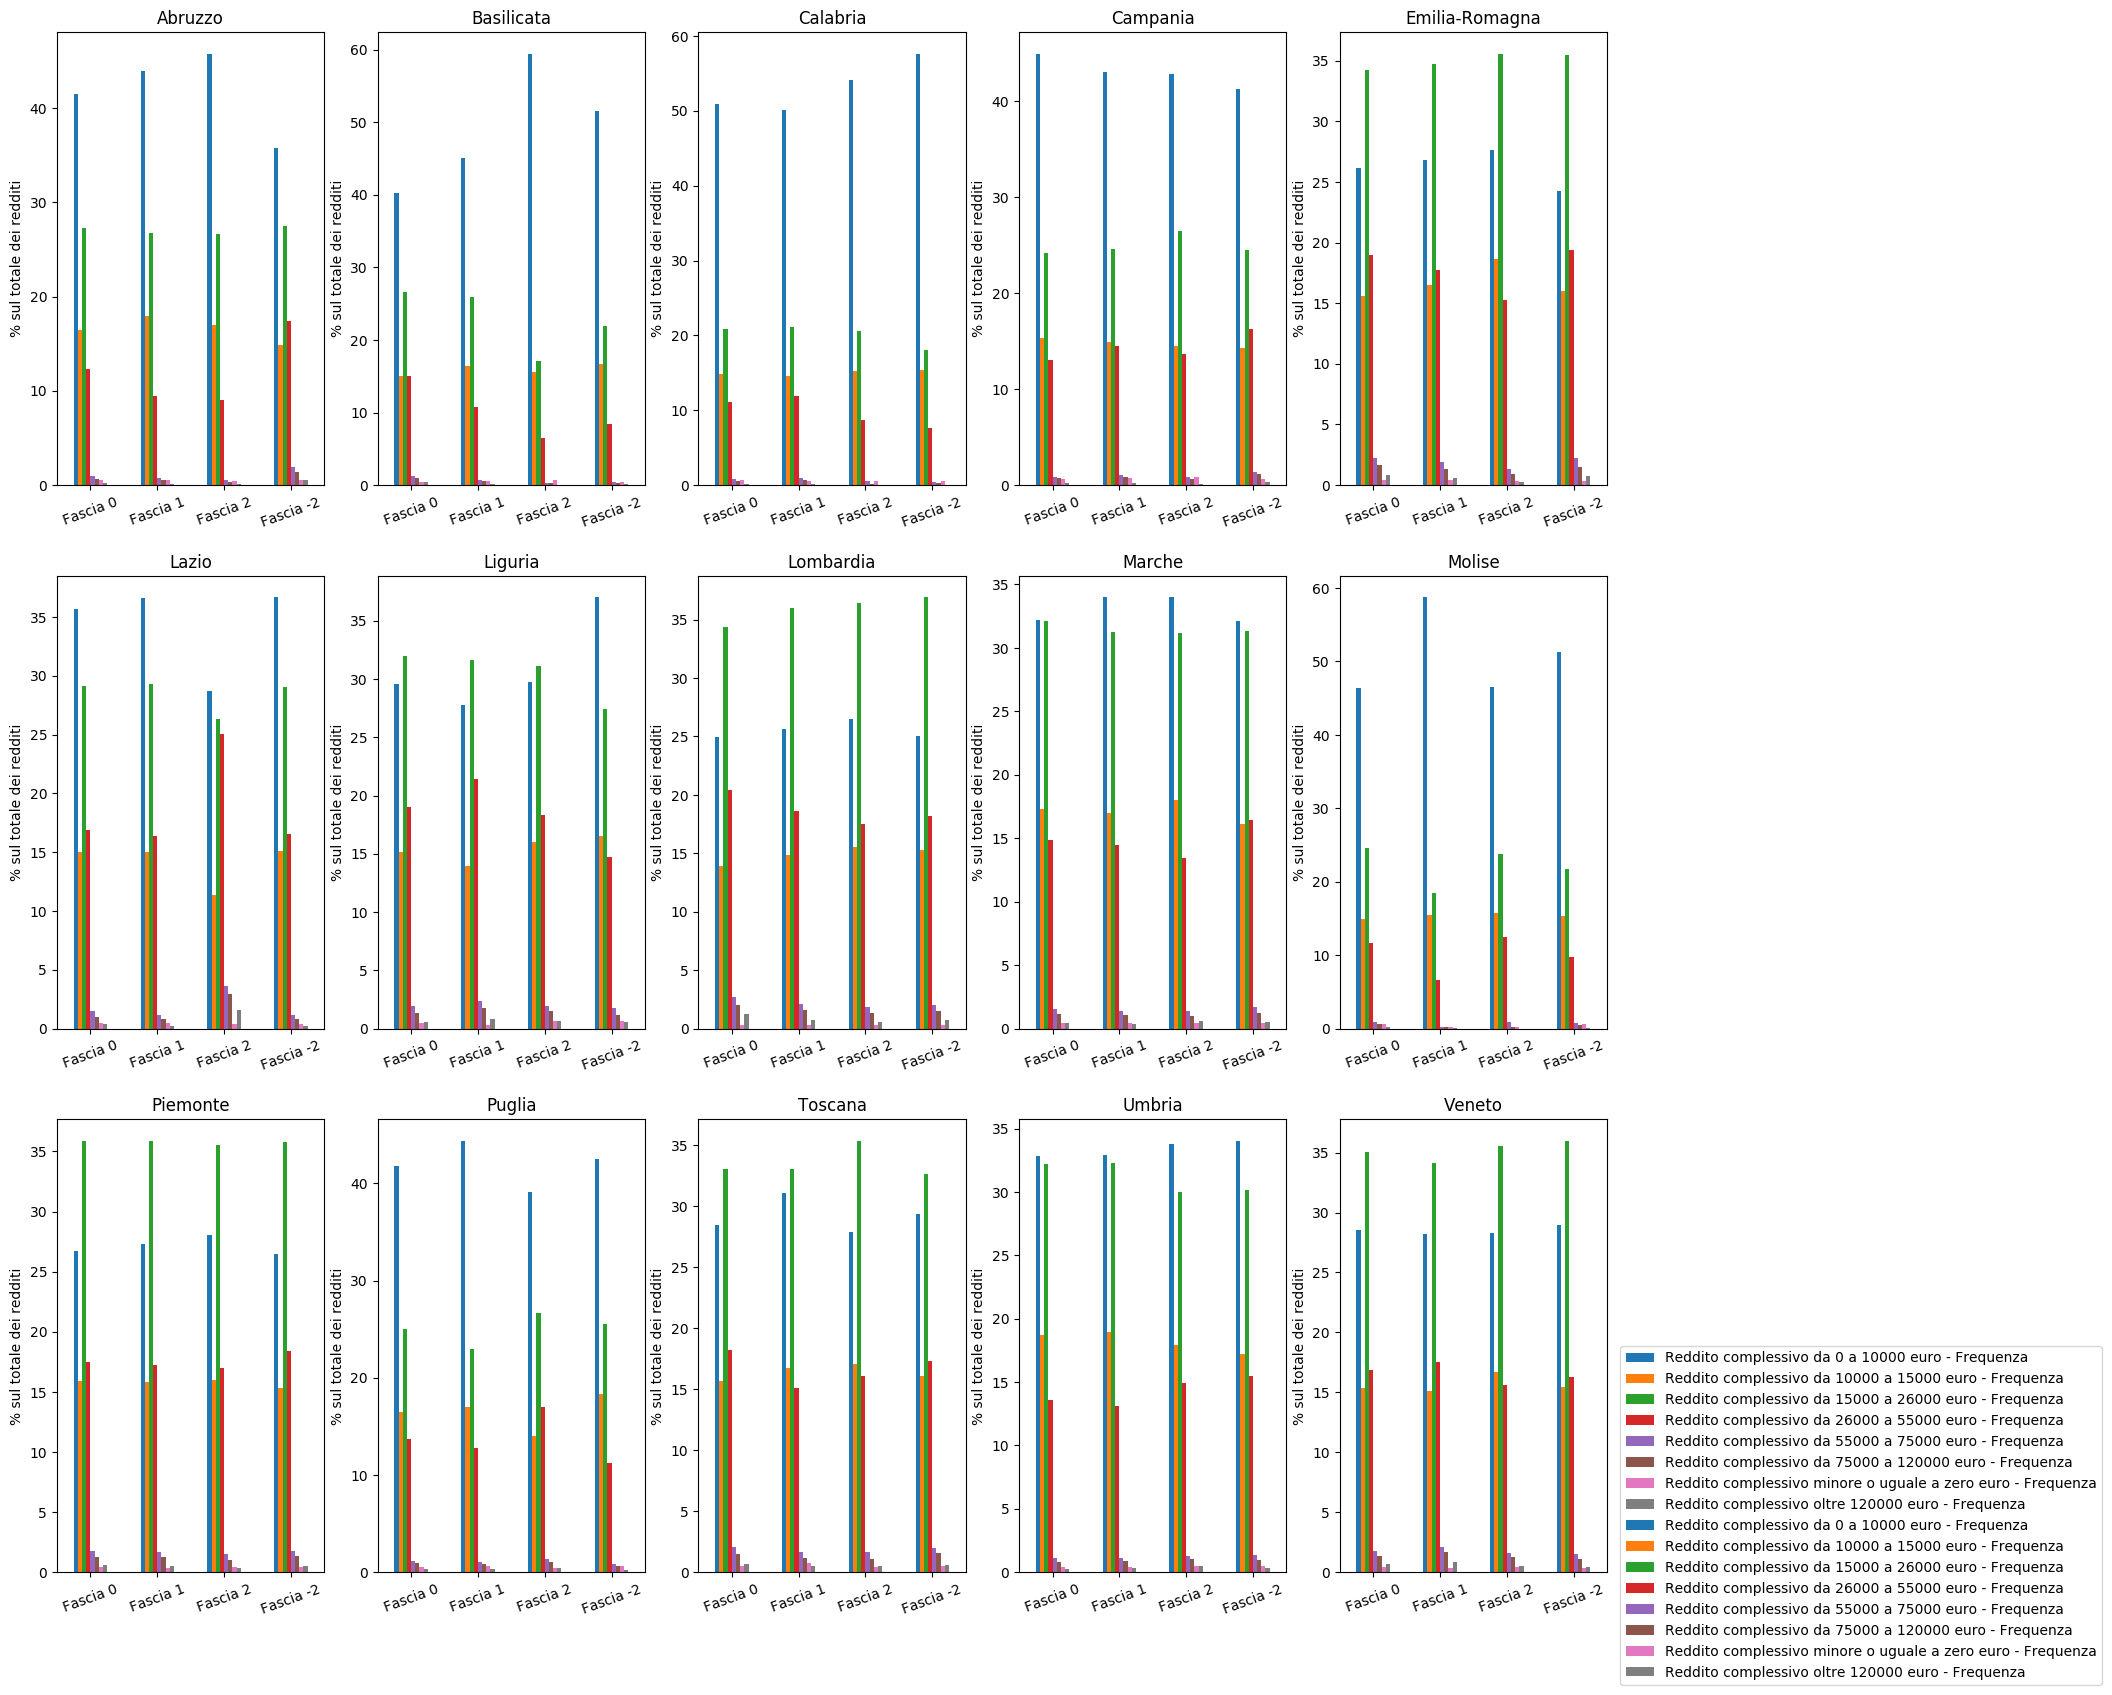

In [136]:
def buckets(i):
    return list(df['LQP_COD_1'].groupby(df['Regione_x']))[i][0]

num_plots = len(df['LQP_COD_1'].groupby(df['Regione_x']).describe())
fig, axes = plt.subplots(3,5,figsize=(20,20))

for i,r in enumerate(regioni):
    fascia_0 = dictionary_fasce['fascia_0'].loc[r]
    fascia_1 = dictionary_fasce['fascia_1'].loc[r]
    fascia_2 = dictionary_fasce['fascia_2'].loc[r]
    fascia_meno_2 = dictionary_fasce['fascia_meno_2'].loc[r]
    
    df_to_plot = pd.DataFrame([fascia_0,fascia_1,fascia_2,fascia_meno_2])
    df_to_plot.index = ['Fascia 0', 'Fascia 1', 'Fascia 2', 'Fascia -2']
    
    row = i // 5
    col = i % 5
    ax_curr = axes[row, col]
    
    df_to_plot.plot.bar(legend=False, ax=ax_curr)#.legend(bbox_to_anchor=(1.05, 0), loc='best', borderaxespad=0.)
    #ax_curr.tick_params(axis='x', labelrotation=45)
    
    for tick in ax_curr.get_xticklabels():
        tick.set_rotation(20)
    #sns.distplot(np.array(distribuzione_regione), ax=ax_curr)
    ax_curr.set_title(buckets(i))
    ax_curr.set_ylabel('% sul totale dei redditi')
    
df_to_plot.plot.bar(legend=False, ax=ax_curr).legend(bbox_to_anchor=(1.05, 0.5), loc='best', borderaxespad=0.)
plt.xticks(rotation = 20)

Una considerazione generale che può essere fatta è che il grafico mostra che per le regioni del Centro/Nord, come `Emilia-Romagna`, `Liguria`, `Lombardia`, `Piemonte`, `Toscana` e `Veneto`, la fascia di reddito in cui i cittadini si trovano è quella tra i 15 e 26 mila euro l'anno.


In termini di `differenza spesa storica fabbisogni standard`, si nota che nel complesso la distribuzione dei redditi rispetto alle fasce di differenza, rimane la stessa al variare della classe.

Le uniche regioni dove si osserva una variazione particolare sono il `Lazio`:
* dove la popolazione, che appartiene ai comuni che registrano una spesa consistentemente più alta dei fabbisogni, ha una percentuale di cittadini con reddito complessivo tra i 26 ed i 55 mila euro, molto più alta delle altre classi.

Mentre in `Liguria`:
* I comuni che compongono la fascia -2 (ove il fabbisogno è molto maggiore della spesa) sono perlopiù con reddito tra 0 e 10000 euro.


Costruiamo lo stesso grafico utilizzando la differenza tra servizi offerti/storici con servizi standard. Nel caso in cui anche in questo caso non osserveremo differenze sostanziali tra le fasce, potremo dire che la situazione è positiva in quanto la quantità di servizi offerti, in termini di viabilità, dai comuni italiani, non sembra essere dipendente dalla classe complessiva di reddito del comune.

In [137]:
# Aggiustare i dati per i plot
fasce = ['fascia_0','fascia_1', 'fascia_2', 'fascia_meno_1', 'fascia_meno_2']

dictionary_fasce = {}
for f in fasce: 
    df_fascia_0 = df[df['scaglioni_servizi'] == f]

    # Ottenere totale frequenze redditi nelle varie regioni
    totale_fascia = df_fascia_0[['Reddito totale frequenze', 'Regione_x']].groupby('Regione_x').sum()['Reddito totale frequenze']

    # Ottenere frequenze sulle diverse fasce di reddito nelle diverse regioni
    redditi_regioni = df_fascia_0[['Reddito complessivo da 0 a 10000 euro - Frequenza', 'Reddito complessivo da 10000 a 15000 euro - Frequenza','Reddito complessivo da 15000 a 26000 euro - Frequenza','Reddito complessivo da 26000 a 55000 euro - Frequenza','Reddito complessivo da 55000 a 75000 euro - Frequenza','Reddito complessivo da 75000 a 120000 euro - Frequenza', 'Reddito complessivo minore o uguale a zero euro - Frequenza', 'Reddito complessivo oltre 120000 euro - Frequenza', 'Regione_x']].groupby('Regione_x').sum()#.describe()

    # Matrice di dati da plottare
    to_plot = redditi_regioni.div(totale_fascia, axis=0)*100
    
    dictionary_fasce[f] = to_plot


# Redditi e tasse
df['Reddito totale frequenze'] = df['Reddito complessivo da 0 a 10000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 10000 a 15000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 15000 a 26000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 26000 a 55000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 55000 a 75000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 75000 a 120000 euro - Frequenza'].fillna(0) + df['Reddito complessivo minore o uguale a zero euro - Frequenza'].fillna(0) + df['Reddito complessivo oltre 120000 euro - Frequenza'].fillna(0) 

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

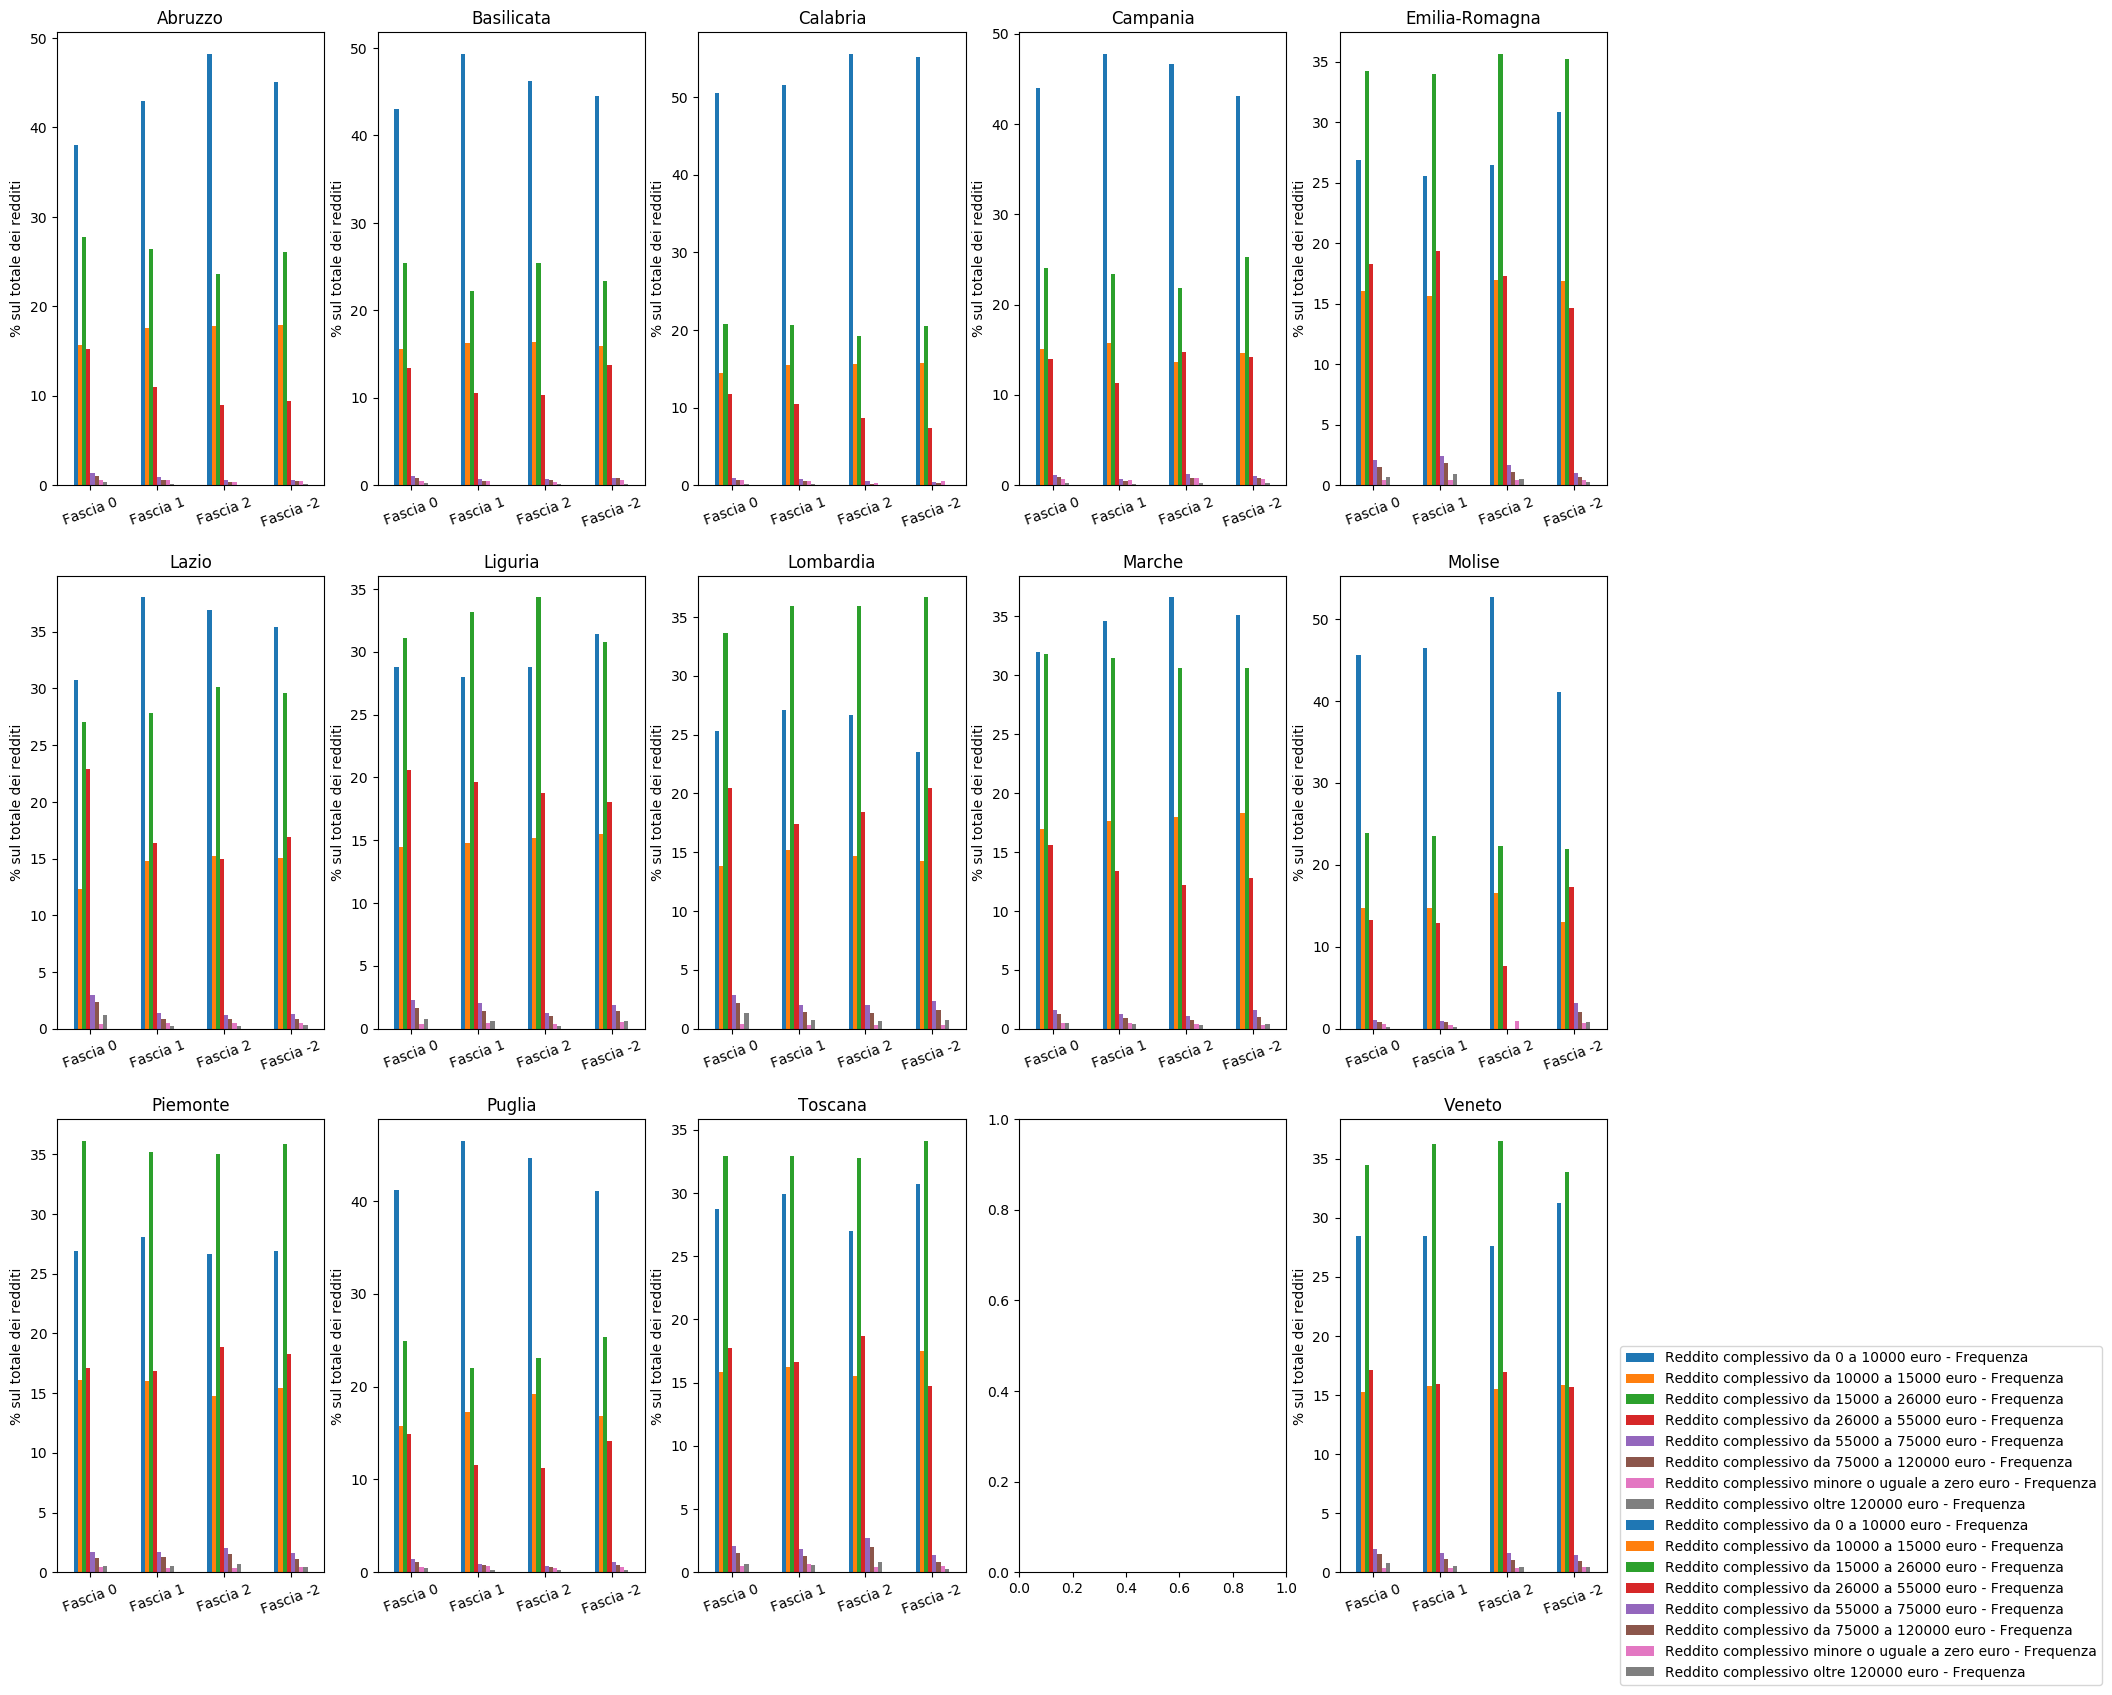

In [138]:
def buckets(i):
    return list(df['LQP_COD_1'].groupby(df['Regione_x']))[i][0]

num_plots = len(df['LQP_COD_1'].groupby(df['Regione_x']).describe())
fig, axes = plt.subplots(3,5,figsize=(20,20))

for i,r in enumerate(regioni):
    try:
        fascia_0 = dictionary_fasce['fascia_0'].loc[r]
    except: continue
    
    try:
        fascia_1 = dictionary_fasce['fascia_1'].loc[r]
    except: continue
    
    try:
        fascia_2 = dictionary_fasce['fascia_2'].loc[r]
    except:continue
        
    try:
        fascia_meno_2 = dictionary_fasce['fascia_meno_2'].loc[r]
    except:continue
        
    df_to_plot = pd.DataFrame([fascia_0,fascia_1,fascia_2,fascia_meno_2])
    df_to_plot.index = ['Fascia 0', 'Fascia 1', 'Fascia 2', 'Fascia -2']
    
    row = i // 5
    col = i % 5
    ax_curr = axes[row, col]
    
    df_to_plot.plot.bar(legend=False, ax=ax_curr)#.legend(bbox_to_anchor=(1.05, 0), loc='best', borderaxespad=0.)
    #ax_curr.tick_params(axis='x', labelrotation=45)
    
    for tick in ax_curr.get_xticklabels():
        tick.set_rotation(20)
    #sns.distplot(np.array(distribuzione_regione), ax=ax_curr)
    ax_curr.set_title(buckets(i))
    ax_curr.set_ylabel('% sul totale dei redditi')
    
df_to_plot.plot.bar(legend=False, ax=ax_curr).legend(bbox_to_anchor=(1.05, 0.5), loc='best', borderaxespad=0.)
plt.xticks(rotation = 20)

Anche in questo caso non si notano cambiamenti sostanziali tra le fasce. Sottolineamo però che in alcune regioni come: `Lazio`, `Lombardia`, `Marche`, `Molise` le fasce con maggiori servizi offerti/storici rispetto i servizi standard, hanno una percentuale più alta di persone appartenenti alle fasce di reddito più basso.

In [139]:
df__2010 = df

## Anno 2013 <a name="#2013"></a>


In questa parte dell'analisi ripeteremo quelle fatte per il 2010.

* Importare dati per svolgere l'analisi:
    - __Dataset 1__: `Open Civitas` fabbisogni comuni 2013.
    - __Dataset 2__: `Anagrafica dei comuni`, 2013.

In [140]:
# Importare dataset 1 e selezionare i dati relativi al 2010
df_integrato = pd.read_csv('opencivitas-spesa-storica+dati-irpef.csv', sep = ',')
df_integrato_2010 = df_integrato[df_integrato['ANNO']==2013]

# Importare dataset 2 
df_2010 = pd.read_csv('FC04A_funz_viabilita2013.csv', sep = ',')[['Anno', 'Codice_Nazionale', 'Codice_Istat',
       'Denominazione Italiana', 'Provincia', 'Sigla Provincia',
       'Codice_Provincia', 'Regione', 'Sigla Regione', 'Codice_Regione',
       'AreaGeo', 'CAT_DET_COD_1', 'CAT_DET_COD_2', 'CAT_DET_COD_3',
       'CAT_DET_COD_4', 'CAT_DET_COD_5', 'CAT_DET_COD_6', 'CAT_DET_COD_7',
       'COEFF_TEORICO', 'IND1', 'IND3', 'IND4', 'IND5', 'IND6', 'IND7', 'IND8',
       'IND9', 'IND10', 'LQP_COD_1', 'LQP_COD_2', 'LQP_COD_3', 'LQP_COD_4',
       'LQP_COD_5', 'LQP_COD_6', 'LQP_COD_S']]

* Otteniamo una vista sul Dataset 1

In [141]:
df_integrato_2010.head(3)

,ANNO,COMUNE_CAT_COD,SPESA_CCC_FC01A,TOT_SPESA_CCC_FC01A,SPESA_CCC_FC01B,TOT_SPESA_CCC_FC01B,SPESA_CCC_FC01C,TOT_SPESA_CCC_FC01C,SPESA_CCC_FC01D,TOT_SPESA_CCC_FC01D,...,Reddito imponibile addizionale - Frequenza,Reddito imponibile addizionale IRPEF - Ammontare,Reddito imponibile addizionale IRPEF - Frequenza,Reddito spettanza imprenditore ordinaria (compresi nulli) - Ammontare,Reddito spettanza imprenditore ordinaria (compresi nulli) - Frequenza,Reddito spettanza imprenditore semplificata (compresi nulli) - Ammontare,Reddito spettanza imprenditore semplificata (compresi nulli) - Frequenza,Regione,Sigla Provincia_y,tot_abitanti_tasse
20062,2013,A001,108324.895,7.767792e+08,732155.494,1.094984e+09,173542.621,6.197194e+08,1807384.600,5.033531e+09,...,11292.0,NaN,NaN,NaN,NaN,NaN,NaN,Veneto,PD,13989.0
20063,2013,A004,10500.000,7.767792e+08,2800.000,1.094984e+09,70.000,6.197194e+08,76255.305,5.033531e+09,...,166.0,NaN,NaN,NaN,NaN,NaN,NaN,Lombardia,LO,208.0
20064,2013,A005,38620.659,7.767792e+08,79267.132,1.094984e+09,59788.603,6.197194e+08,310894.899,5.033531e+09,...,1993.0,NaN,NaN,NaN,NaN,NaN,NaN,Lombardia,LC,2431.0


* Otteniamo una vista sul Dataset 2

In [142]:
df_2010.head(3)

,Anno,Codice_Nazionale,Codice_Istat,Denominazione Italiana,Provincia,Sigla Provincia,Codice_Provincia,Regione,Sigla Regione,Codice_Regione,...,IND8,IND9,IND10,LQP_COD_1,LQP_COD_2,LQP_COD_3,LQP_COD_4,LQP_COD_5,LQP_COD_6,LQP_COD_S
0,2013,A052,6001,Acqui Terme,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,0.007859,14.0,2.726687,27.275620,-25.356476,0,0,8.0,4.0,3.6
1,2013,A146,6002,Albera Ligure,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,0.000000,0.0,0.000000,51.700794,38.777238,0,0,9.0,8.0,5.6
2,2013,A182,6003,Alessandria,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,0.009552,13.0,10.969565,-35.979325,-29.652084,0,0,2.0,4.0,6.0


* Quindi uniamo le informazioni contenute nei due dataset utilizzando come elemento comune il `Codice nazionale` di ogni comune, e mostriamo una vista del dataset ottenuto.

In [143]:
df = pd.merge(df_2010,  df_integrato_2010, right_on = 'COMUNE_CAT_COD', left_on = 'Codice_Nazionale', how = 'left')

df.head(3)

,Anno,Codice_Nazionale,Codice_Istat,Denominazione Italiana_x,Provincia,Sigla Provincia,Codice_Provincia,Regione_x,Sigla Regione,Codice_Regione,...,Reddito imponibile addizionale - Frequenza,Reddito imponibile addizionale IRPEF - Ammontare,Reddito imponibile addizionale IRPEF - Frequenza,Reddito spettanza imprenditore ordinaria (compresi nulli) - Ammontare,Reddito spettanza imprenditore ordinaria (compresi nulli) - Frequenza,Reddito spettanza imprenditore semplificata (compresi nulli) - Ammontare,Reddito spettanza imprenditore semplificata (compresi nulli) - Frequenza,Regione_y,Sigla Provincia_y,tot_abitanti_tasse
0,2013,A052,6001,Acqui Terme,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,11409.0,NaN,NaN,NaN,NaN,NaN,NaN,Piemonte,AL,14509.0
1,2013,A146,6002,Albera Ligure,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,203.0,NaN,NaN,NaN,NaN,NaN,NaN,Piemonte,AL,254.0
2,2013,A182,6003,Alessandria,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,53292.0,NaN,NaN,NaN,NaN,NaN,NaN,Piemonte,AL,66027.0


* Effettuiamo un controllo sul numero di comuni che non sono in entrambi i dataset e di cui, necessariamente abbiamo perso le informazioni unendo i due dataset.

In [144]:
print ("Nel passaggio precedente abbiamo perso le informazioni relative a ", sum(df['Regione_y'].isnull()==True)/len(df['Codice_Nazionale'].unique())*100 , "% dei comuni. Vista la bassa percentuale proseguiamo l'analisi.")

Nel passaggio precedente abbiamo perso le informazioni relative a  0.880728466935 % dei comuni. Vista la bassa percentuale proseguiamo l'analisi.


### 2.1. Spesa pro-capite: top-10 e bottom-10 delle province italiane  <a name="par2.1"></a>

Per avere un'idea di quanto sia la spesa procapite nei comuni d'Italia, presentiamo la classifica dei 10 comuni che spendono di più e dei 10 che spendono di meno.

Prima di selezionare i comuni prendiamo in considerazione la distribuzione dell'indicatore che indica la spesa del comune pero-capite per la viabilità.

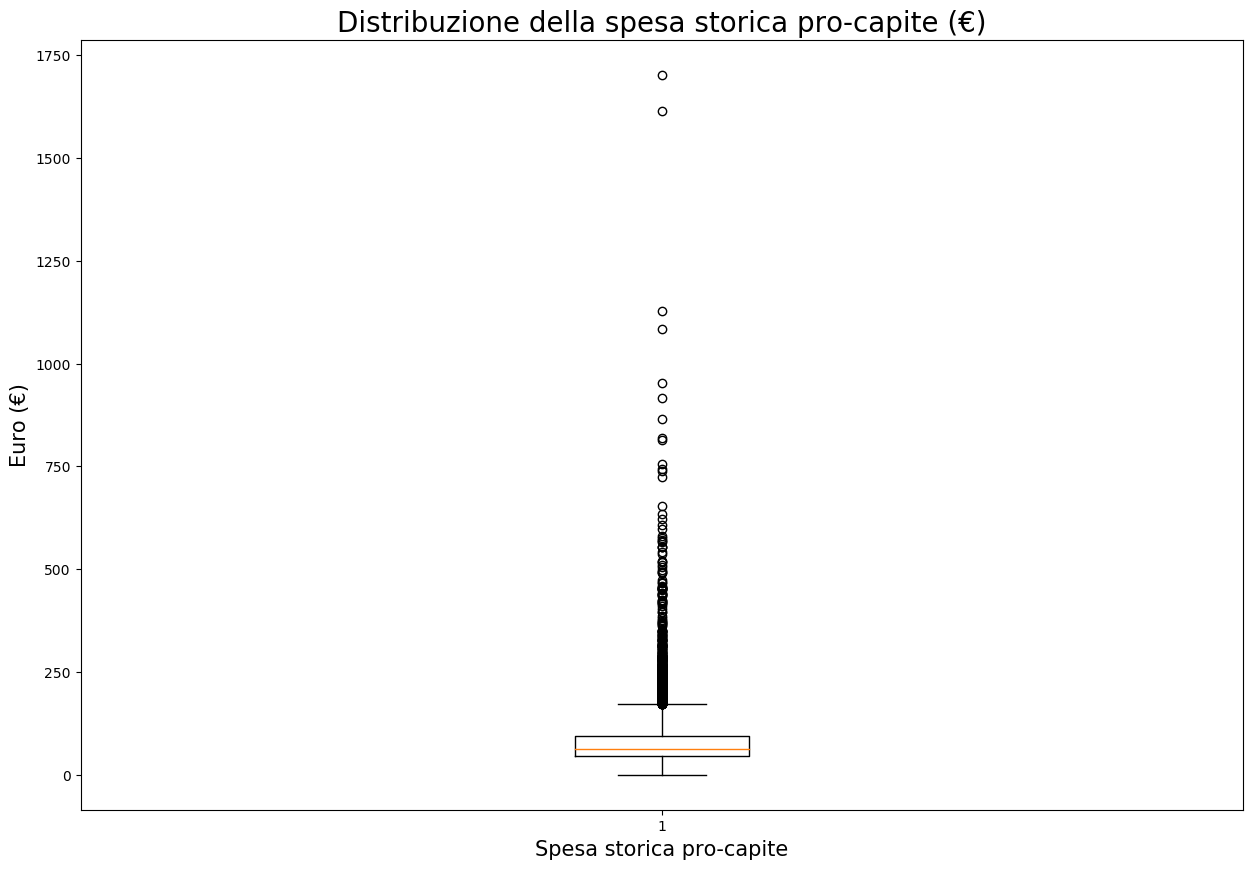

In [145]:
# Non consideriamo i valori nulli
distr_ = [i for i in df['IND1'] if math.isnan(i)==False]

# Creiamo un plot che ci mostri la distribuzione dell'indicatore sui comuni
plt.figure(figsize=(15,10))
plt.boxplot(np.array(distr_))
plt.title('Distribuzione della spesa storica pro-capite (€)', fontsize = 20)
plt.xlabel('Spesa storica pro-capite', fontsize = 15)
plt.ylabel('Euro (€)', fontsize = 15)

Dal grafico osserviamo che ci sono tanti valori fuori dal box e dalla differenza interquartilica. Questi valori sono definiti outliers. Essendo  i valori assunti un po' irragionevoli (troppo elevati) li eliminiamo dalla nostra analisi di spesa procapite. Inpiù, decidiamo di rimuovere quei comuni che registrano come valore 0. 

__In generale__ sarebbe interessante studiare i comuni che risultano essere outliers e che registrano una spesa procapite pari a zero. Non ci soffermiamo du questo punto in quanto non obiettivo dell'analisi.

<a name='procapite2013'></a>

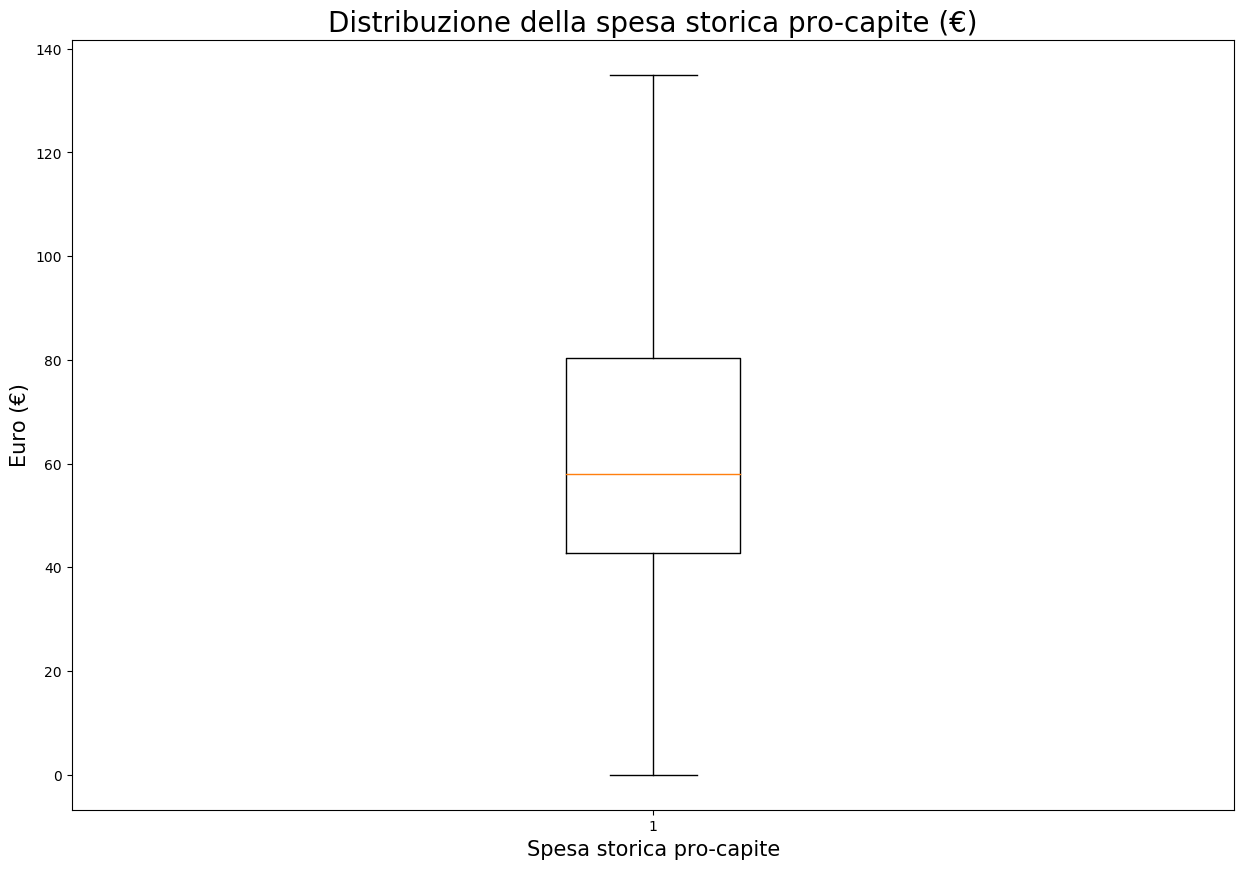

In [146]:
# Non consideriamo i valori nulli
distr_ = [i for i in df['IND1'] if math.isnan(i)==False and i < 135 and i > 0]

# Creiamo un plot che ci mostri la distribuzione dell'indicatore sui comuni
plt.figure(figsize=(15,10))
plt.boxplot(np.array(distr_))
plt.title('Distribuzione della spesa storica pro-capite (€)', fontsize = 20)
plt.xlabel('Spesa storica pro-capite', fontsize = 15)
plt.ylabel('Euro (€)', fontsize = 15)

Quindi, nel 50% dei comuni la spesa pro-capite dei comuni italiani è compresa tra 0 e ~60 euro. Mentre solo il 25% dei comuni spende più di ~80 euro per cittadino.

### Bottom 10

I comuni italiani con la spesa pro-capite (superiore a zero) per la viabilità sono i seguenti. 

La spesa oscilla tra i ~2 centesimi di Cervesinao, un paese in provincia di Pavia con più di 1000 abitanti, dove si suppone che viste le dimension del comune la spesa per la viabilità sia molto ridotta, fino ai poco più di 3 euro di Cancello ed Arnone, comune di ~5500 abitanti in provincia di Caserta. 

In [147]:
# Ottieni la lista dei comuni
df[['Denominazione Italiana_x', 'IND1', 'Regione_x', 'AreaGeo']][(df['IND1'] > 0) & (df['IND1']<135)].sort_values('IND1')[:10]

,Denominazione Italiana_x,IND1,Regione_x,AreaGeo
4462,Cervesina,0.017713,Lombardia,Nord-ovest
2511,Marcedusa,0.131138,Calabria,Sud
3714,Fiorano Modenese,0.181361,Emilia-Romagna,Nord-est
4300,Mezzani,0.520823,Emilia-Romagna,Nord-est
3735,Ravarino,0.787075,Emilia-Romagna,Nord-est
3728,Nonantola,0.798833,Emilia-Romagna,Nord-est
572,Villafranca d'Asti,0.867762,Piemonte,Nord-ovest
3813,Casalnuovo di Napoli,3.221497,Campania,Sud
3346,Sonnino,3.303080,Lazio,Centro
1598,Cancello ed Arnone,3.350423,Campania,Sud


### Top 10

Evidenziamo quindi i comuni con la spesa pro-capite più elevata.

Sei sui dieci comuni si trovano nel Nord Italia. 

In [148]:
# Ottieni la lista dei comuni
df[['Denominazione Italiana_x', 'IND1', 'Regione_x','Provincia' ,'AreaGeo']][(df['IND1'] > 0) & (df['IND1']<135)].sort_values('IND1')[-10:]

,Denominazione Italiana_x,IND1,Regione_x,Provincia,AreaGeo
2189,Tremezzo,134.340331,Lombardia,Como,Nord-ovest
5305,Monticiano,134.405776,Toscana,Siena,Centro
6320,Valduggia,134.525356,Piemonte,Vercelli,Nord-ovest
790,Camerata Cornello,134.550303,Lombardia,Bergamo,Nord-ovest
389,Rivisondoli,134.623253,Abruzzo,L'Aquila,Sud
2845,Moneglia,134.623656,Liguria,Genova,Nord-ovest
513,Grana,134.683969,Piemonte,Asti,Nord-ovest
3246,Marciana,134.811843,Toscana,Livorno,Centro
3116,Perledo,134.951732,Lombardia,Lecco,Nord-ovest
2350,Castroregio,134.995366,Calabria,Cosenza,Sud


### 2.2. Differenza percentuale tra spesa storica e fabbisogno standard  <a name='par2.2'></a>

Proseguiamo quindi ponendo la nostra attenzione su la differenza percentuale tra la spesa storica ed il fabbisogno standard dei comuni italiani. In particolare, ad ogni comune mettiamo una label che specifica a quale fascia il comune appartiene.

* __Fascia 2__: La differenza percentuale è maggiore di 100, il che descrive che la spesa è almeno due volte i fabbisogni del comune.
* __Fascia 1__: La differenza percentuale è compresa tra 25 e 100, quindi la spesa è tra una e due volte più grande dei fabbisogni.
* __Fascia 0__: La differenza perdentuale è compresa tra -25 e 25, quindi la spesa è di poco più grande o più piccola dei fabbisogni standard.
* __Fascia -1__: La differenza percentuale è compresa tra -25 e -50, quindi i fabbisogni sono tra una e due volte più grande della spesa.
* __Fascia -2__: La differenza percentuale è compresa tra -50 e -100, il che descrive che i fabbisogni sono almeno due volte la spesa del comune.

Le fasce sono state definite tenenendo in considerazione le distribuzioni della differenza percentuale dei comuni di ogni regione. Per ognuna, infatti, si osserva che non considerando le code delle distribuzioni (outliers > 100%) i valori della differenza percentuale sono più o meno simmetrici rispetto al valore centrale.

In [149]:
# Definiamo la funzione che creerà le labels per i comuni
def fasce(x):
    if  200>x >= 100 :
        return ("fascia_2")
    elif 25<x<100:
        return ("fascia_1")
    elif -25<=x<=25:
        return ("fascia_0")
    elif -25<x<-50:
        return ("fascia_meno_1")
    elif -100<=x<=-50:
        return ("fascia_meno_2")
    
    
# Quindi creiamo le labels
df['fasce'] = df.LQP_COD_1.apply(fasce)

* Come prima cosa studiamo quanti sono i comuni che appartendono all'una o all'altra fascia.

In [150]:
df_2013 = df['fasce'].value_counts()/sum(df['fasce'].value_counts())*100
df_2013

fascia_0         59.066114
fascia_1         30.874973
fascia_meno_2     6.065896
fascia_2          3.993018
Name: fasce, dtype: float64

- Il __59%__ dei comuni italiani appartiene alla fascia zero. Possiamo quindi dire che in più della metà dei comuni la differenza percentuale tra la spesa storica ed i fabbisogni è, in valore assoluto, non superiore al 25%, che vede ancora uno squilibrio tra spesa e fabbisogni, ma meno grave di quella che si osserva nelle altre fasce.

- Nel __30%__ dei comuni italiani la spesa eccede i fabbisogni tra 25% ed il 100%. Quindi, in dei casi si avvicina a raddoppiare i fabbisogni standard.

- __6%__ dei comuni registrano una spesa storica che può essere due volte *inferiore* ai fabbisogni.

- Infine, il __3%__ spende storicamente più di due volte i fabbisogni standard.


Visualizziamo come i comuni di ogni regione, presente nel dataset - 15 regioni-, si distribuiscono sulle fasce.

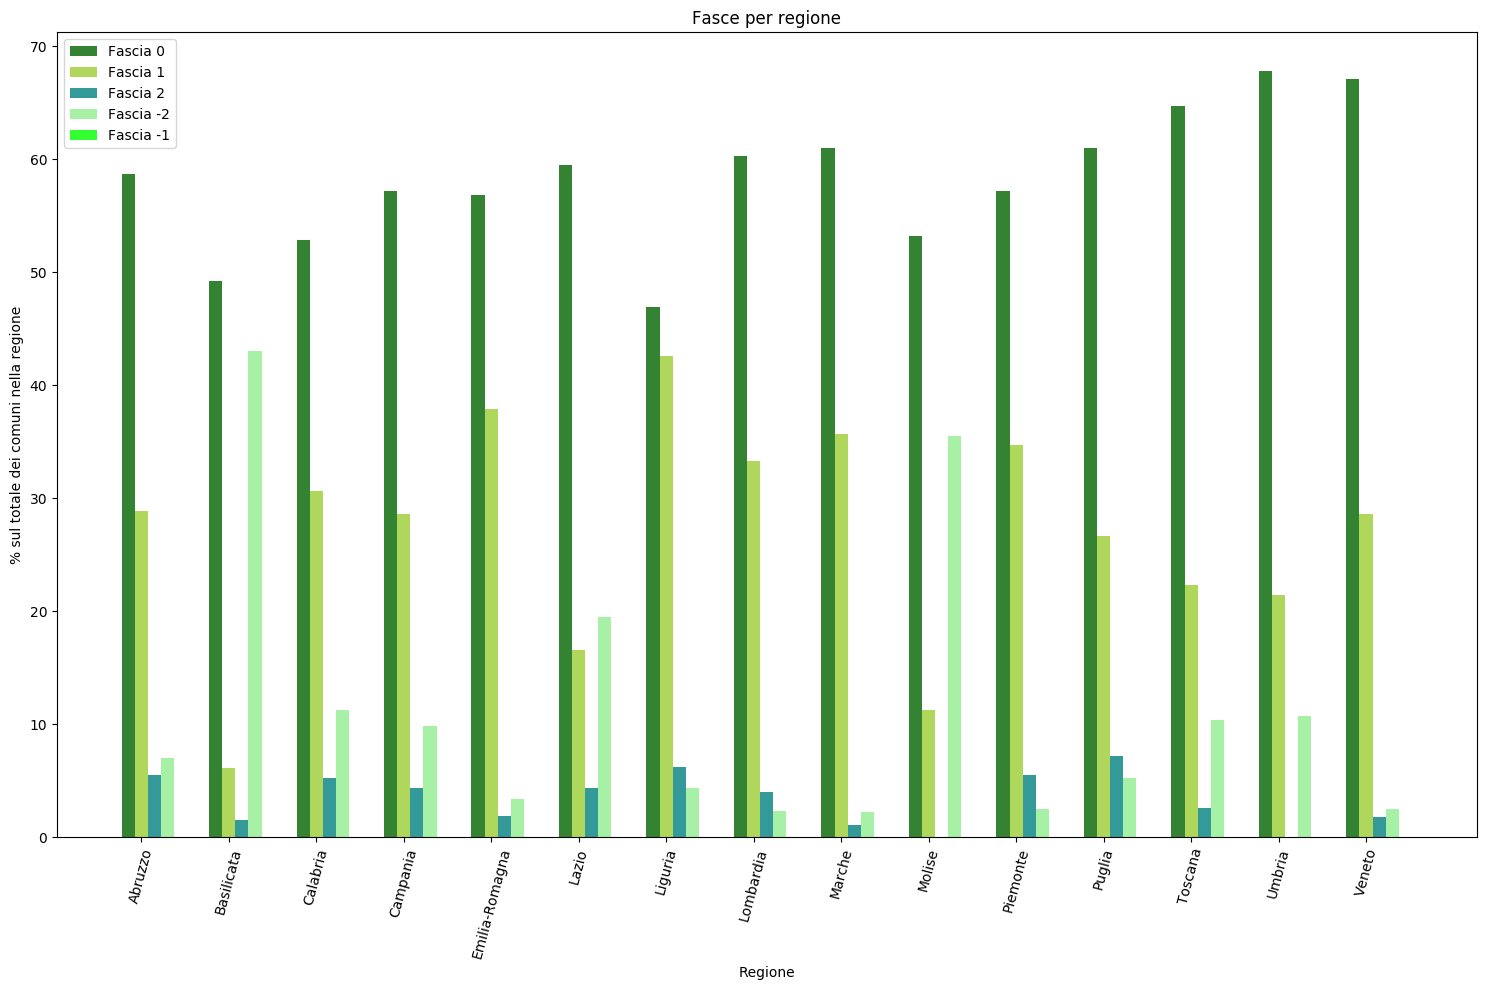

In [151]:
# Creare il grafico
voter_tab = pd.crosstab(df['fasce'], df['Regione_x'], margins = True).iloc[:,:15]
voter_tab = voter_tab/voter_tab.loc['All']*100

n_groups = 15
fascia_0 = voter_tab.loc['fascia_0']
fascia_1 = voter_tab.loc['fascia_1']#[i for i,j in list_fasce['fascia_1']]
fascia_2 = voter_tab.loc['fascia_2']#[i for i,j in list_fasce['fascia_2']]
fascia_meno_1 = [0]*n_groups
fascia_meno_2 = voter_tab.loc['fascia_meno_2']#[i for i,j in list_fasce['fascia_meno_2']]
 
# create plot
plt.figure(figsize=(15,10))
fig, ax = plt.subplots(figsize=(15,10))
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8
 
rects1 = plt.bar(index, fascia_0, bar_width,
                 alpha=opacity,
                 color='darkgreen',
                 label='Fascia 0')
 
rects2 = plt.bar(index + bar_width, fascia_1, bar_width,
                 alpha=opacity,
                 color='yellowgreen',
                 label='Fascia 1')

rects2 = plt.bar(index + 2*(bar_width), fascia_2, bar_width,
                 alpha=opacity,
                 color='teal',
                 label='Fascia 2')

rects2 = plt.bar(index + 3*(bar_width), fascia_meno_2, bar_width,
                 alpha=opacity,
                 color='lightgreen',
                 label='Fascia -2')

rects2 = plt.bar(index + 4*(bar_width), fascia_meno_1, bar_width,
                 alpha=opacity,
                 color='lime',
                 label='Fascia -1')
 

 
plt.xlabel('Regione')
plt.ylabel('% sul totale dei comuni nella regione')
plt.title('Fasce per regione')
plt.xticks(index + bar_width, voter_tab.columns, rotation =75)
plt.legend()
 
plt.tight_layout()
plt.show()

Osserviamo come le regioni dell'area Sud/Centro della penisola:
* `Abruzzo, Basilicata, Calabria, Campania, Lazio , Molise, Toscana ed Umbria`, registrano che più del 10% dei loro comuni appartiane alla fascia -2, dove i fabbisogni eccedono la spesa di almeno due volte. 

* `Basilicata, Lazio e Molise` sono le tre regioni che hanno più comuni appartenenti alla fascia meno due rispetto a  quelli appartenenti alla fascia 1. Il che sta a significare che la spesa che i comuni registrano per la viabilità non è sufficiente a soddisfare quanto riportato nei fabbisogni standard.

* La `Puglia` è la regione che registra la più alta percentuale di comuni appartenenti alla fascia 2, per cui la spesa eccede più di due volte il fabbisogno.

La presenza di queste caratteristiche tra Nord e resto dell'Italia è confermata dal fatto che le due variabili categoriche (`Regioni`, `Fasce`) risultano avere un'associazione statistica. Infatti, il test Chi-quadro per l'indipendenza statistica delle variabili, afferma che le due non lo sono. A seguire è riportato il test:

$H_0$: Variabile  `Regione` and variabile `Fasce` sono indipendenti.

$H_a$:  Variabile  `Regione` and variabile `Fasce` sono indipendenti

L'ipotesi alternativa è che sapere il livello della variabile `Regione` può aiutare a predire il livelli della variabile `Fasce`. 

In ogni caso, è __importante__ notare che se l'ipotesi nulla viene rifiutata, il test suggerisce solo la presenza di relazione statistica tra le variabili, che non deve necessariamente essere causale.

In [152]:
# Definizione della tabella delle contingenze
voter_tab = pd.crosstab(df['fasce'], df['Regione_x'], margins = True)
observed = voter_tab.iloc[0:5,0:55]


# Tabella dei valori attesi
expected =  np.outer(voter_tab["All"][0:5],
                     voter_tab.loc["All"][0:15]) / 5221

expected = pd.DataFrame(expected)

expected.columns = voter_tab.columns[0:15]
expected.index = ['fascia_0', 'fascia_1', 'fascia_2', 'fascia_meno_1', 'fascia_meno_2']


# Definire il valore della statistica test
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print("Il valore della statistica test è: ", chi_squared_stat)


crit = stats.chi2.ppf(q = 0.95, # Trovare il valore critico per 1-alpha(=.95) livello di confidenza*
                      df = 56)  #Il numero di gradi di liberta è pari  al numero livelli var 1 -1 moltiplicato
                                # numero livalli var 2 - 1 *

print("Valore critico: ", crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=56)
print("P value: ", p_value)

Il valore della statistica test è:  3710.302883248312
Valore critico:  74.4683241593
P value:  0.0


Conseguentemente, essendo il *p-value* uguale a 0 l'iposesi di indipendenza tra le variabili (nulla) è rifiutata.

### 2.3. Differenza spesa e fabbisogno a confronto con la differenza tra servizi storici e servizi standard <a name='par2.3'></a>

Ci soffermiamo sulla variabile `Differenza tra livello dei servizi storico e livello dei servizi standard, rispetto al livello dei servizi standard`. Pertanto, per questa variabile, se confrontata con la `differenza tra spesa storica e fabbisogno standard`, ci aspettiamo che per i comuni in cui la spesa supera consistentemente i fabbisogni, il valore della differenza tra i servizi sia positivo. 

Essendo la nuava variabile continua, anche in questo caso decidiamo di dividere la differenza in fasce.

In [153]:
# Quindi creiamo le labels
df['scaglioni_servizi'] = df.LQP_COD_2.apply(fasce)

Diamo un'occhiata a come i comuni si distribuiscono sulle fasce create. 

In [154]:
df['scaglioni_servizi'].value_counts()/sum(df['scaglioni_servizi'].value_counts())*100

fascia_0         49.889564
fascia_meno_2    30.866924
fascia_1         15.571507
fascia_2          3.672004
Name: scaglioni_servizi, dtype: float64

La maggior parte dei comuni mostrano un equilibro tra servizi storici e servizi standard. 

Poniamo l'attenzione sull'identificazione di alcune classi di comuni per poi studiarne le caratteristiche in termini di reddito.

In generale, non siamo contenti se osserviamo l'esistenza di comuni la cui spesa è superiore al fabbisogno ma i servizi offerti sono al di sotto degli standard. Infatti, questo protebbe essere un indicatore di "spreco", poichè sembrerebbe che la spesa elevata non necessariamente corrisponde ad un ottimo livello di servizi rispetto lo standard. Quindi poniamo l'attenzione su questa classe di comuni.

In [155]:
def non_buono(x):
    #print (x)
    #print ('+'*20)
    if (100>x['LQP_COD_1']>25)  and (-100<x['LQP_COD_2']<-25):
        return 'NON BUONO'
    else:
        return 'ALTRO'

* Creiamo quindi la nuova variabile

In [156]:
# Creare la nuova variabile
df['etichetta_non_buono'] = df.apply(non_buono, axis=1)

* Cerchiamo di capire dove sono collocati, in termini di regioni, questi comuni e rispetto al totale dei comuni della regione quale percentuale rappresentano. <a name='confronto.3'></a>

In [157]:
pre_pro = pd.crosstab(df['etichetta_non_buono'], df['Regione_x'], margins = True).iloc[:,:15]

to_plot = (pre_pro/pre_pro.loc['All']*100).loc['NON BUONO']

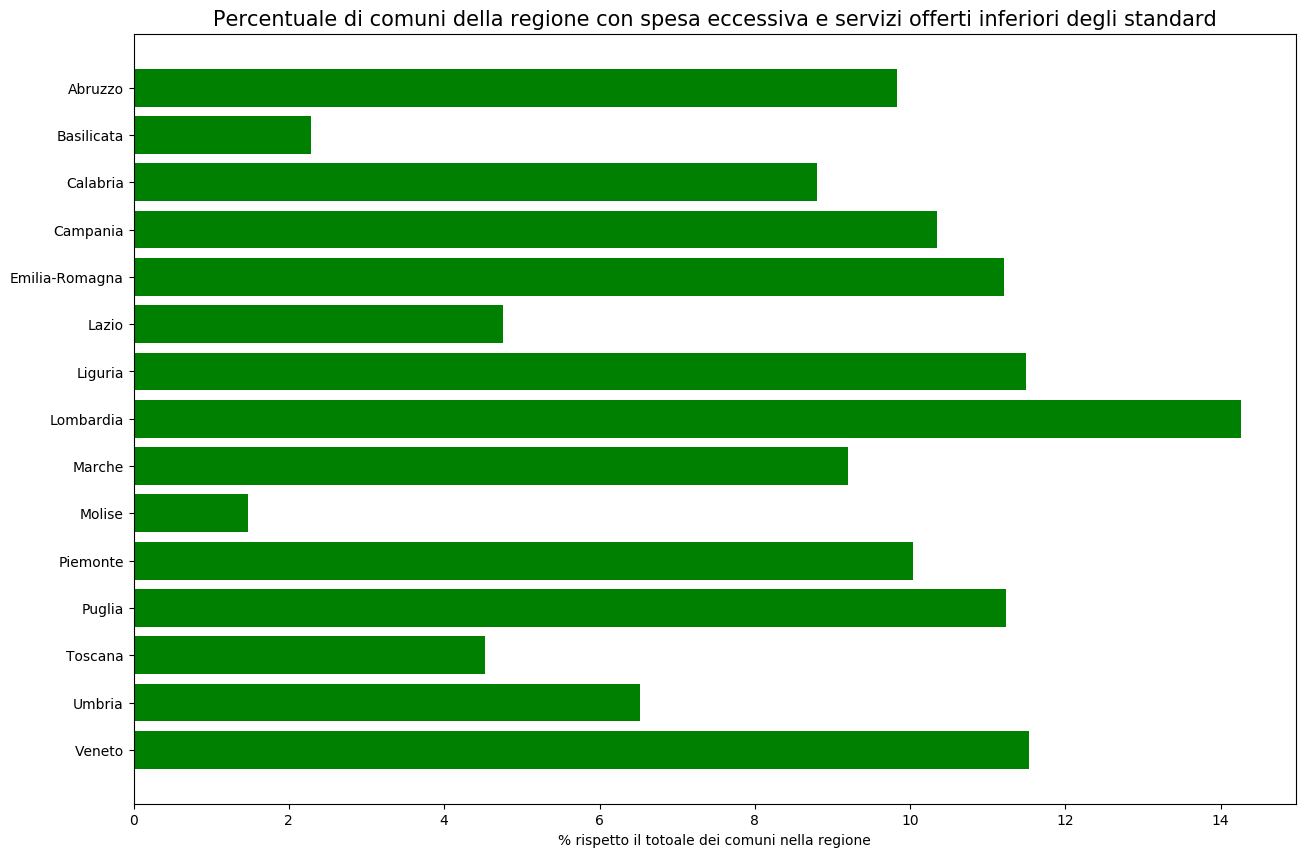

In [158]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15,10))

# Example data
regioni = list(to_plot.index)
y_pos = np.arange(len(regioni))
performance = to_plot

ax.barh(y_pos, performance, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(regioni)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('% rispetto il totoale dei comuni nella regione')
ax.set_title('Percentuale di comuni della regione con spesa eccessiva e servizi offerti inferiori degli standard', fontsize =15)

plt.show()

Mentre per il resto delle regioni, più del 5% dei comuni vede che la spesa storica è maggiore dei fabbisogni e che il livello di servizi offerto è inferiore ad i servizi standard. Ciò ci conferma che certe anomalie, quindi presenze di sprechi nei comuni, non sono presinti solo al Centro o al Sud. Bensì una consistente fetta di comuni che mostrano questi squilibri si trova nella parte settentrionale della penisola.

Tra le regioni, quelle che non superano il 5% sono tutte del Centro/Sud.

Ripetiamo la stessa analisi per osservare la distribuzione dei comuni che mantengono un equilibrio tra spesa e fabbisogni e servizi offerti e servizi standard.

<a name='confronto.3_'></a>

In [159]:
def molto_buono(x):
    #print (x)
    #print ('+'*20)
    if  (x['LQP_COD_1']<25) & (x['LQP_COD_1']>-25)  & (x['IND4']<25) &(x['IND4']>-25):
        return 'molto BUONO'
    else:
        return 'ALTRO'

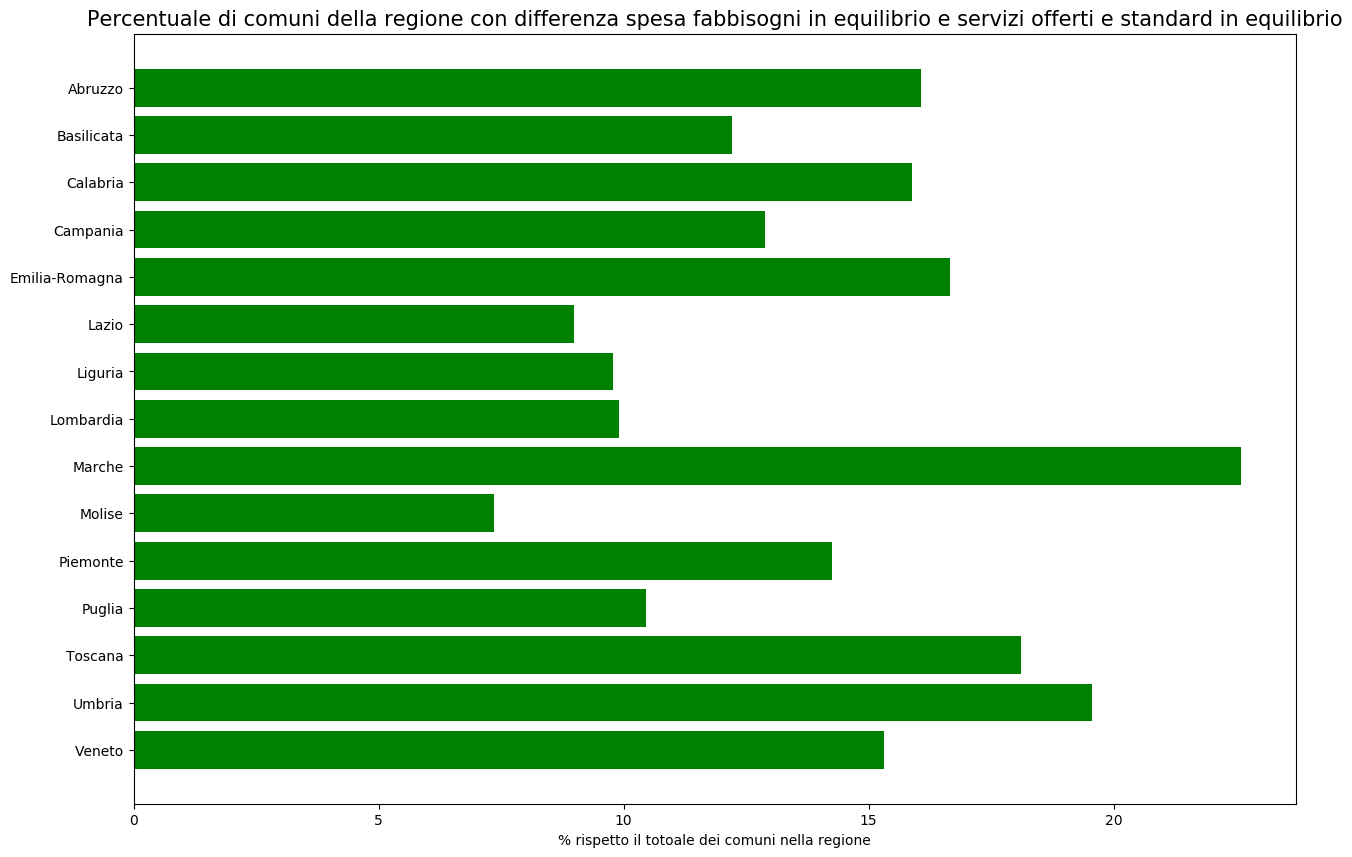

In [160]:
# Creare la nuova variabile
df['etichetta_nolto_buono'] = df.apply(molto_buono, axis=1)

pre_pro = pd.crosstab(df['etichetta_nolto_buono'], df['Regione_x'], margins = True).iloc[:,:15]

to_plot = (pre_pro/pre_pro.loc['All']*100).loc['molto BUONO']



plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15,10))

# Example data
regioni = list(to_plot.index)
y_pos = np.arange(len(regioni))
performance = to_plot

ax.barh(y_pos, performance, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(regioni)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('% rispetto il totoale dei comuni nella regione')
ax.set_title('Percentuale di comuni della regione con differenza spesa fabbisogni in equilibrio e servizi offerti e standard in equilibrio', fontsize =15)

plt.show()

`Lazio`, `Liguria`, `Lombardia` e  `Molise` sono le tre regioni con le inferiori percentuali di comuni in "equilibrio" rispetto al resto delle regioni. 

### 2.4. Caratteristiche di reddito dei comuni appartenenti a diverse fasce <a name='par2.4'></a>

In questa sezione cerchiamo di capire le caratteristiche di reddito dei comuni appartenenti alle diverse fasce. In particolar modo, scegliamo di mostrare le distribuzioni di reddito, a seconda della fascia, per tutte le regioni.

In [161]:
# Redditi e tasse
df['Reddito totale frequenze'] = df['Reddito complessivo da 0 a 10000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 10000 a 15000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 15000 a 26000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 26000 a 55000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 55000 a 75000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 75000 a 120000 euro - Frequenza'].fillna(0) + df['Reddito complessivo minore o uguale a zero euro - Frequenza'].fillna(0) + df['Reddito complessivo oltre 120000 euro - Frequenza'].fillna(0) 

# Aggiustare i dati per i plot
fasce = ['fascia_0','fascia_1', 'fascia_2', 'fascia_meno_1', 'fascia_meno_2']

dictionary_fasce = {}
for f in fasce: 
    df_fascia_0 = df[df['fasce'] == f]

    # Ottenere totale frequenze redditi nelle varie regioni
    totale_fascia = df_fascia_0[['Reddito totale frequenze', 'Regione_x']].groupby('Regione_x').sum()['Reddito totale frequenze']

    # Ottenere frequenze sulle diverse fasce di reddito nelle diverse regioni
    redditi_regioni = df_fascia_0[['Reddito complessivo da 0 a 10000 euro - Frequenza', 'Reddito complessivo da 10000 a 15000 euro - Frequenza','Reddito complessivo da 15000 a 26000 euro - Frequenza','Reddito complessivo da 26000 a 55000 euro - Frequenza','Reddito complessivo da 55000 a 75000 euro - Frequenza','Reddito complessivo da 75000 a 120000 euro - Frequenza', 'Reddito complessivo minore o uguale a zero euro - Frequenza', 'Reddito complessivo oltre 120000 euro - Frequenza', 'Regione_x']].groupby('Regione_x').sum()#.describe()

    # Matrice di dati da plottare
    to_plot = redditi_regioni.div(totale_fascia, axis=0)*100
    
    dictionary_fasce[f] = to_plot

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

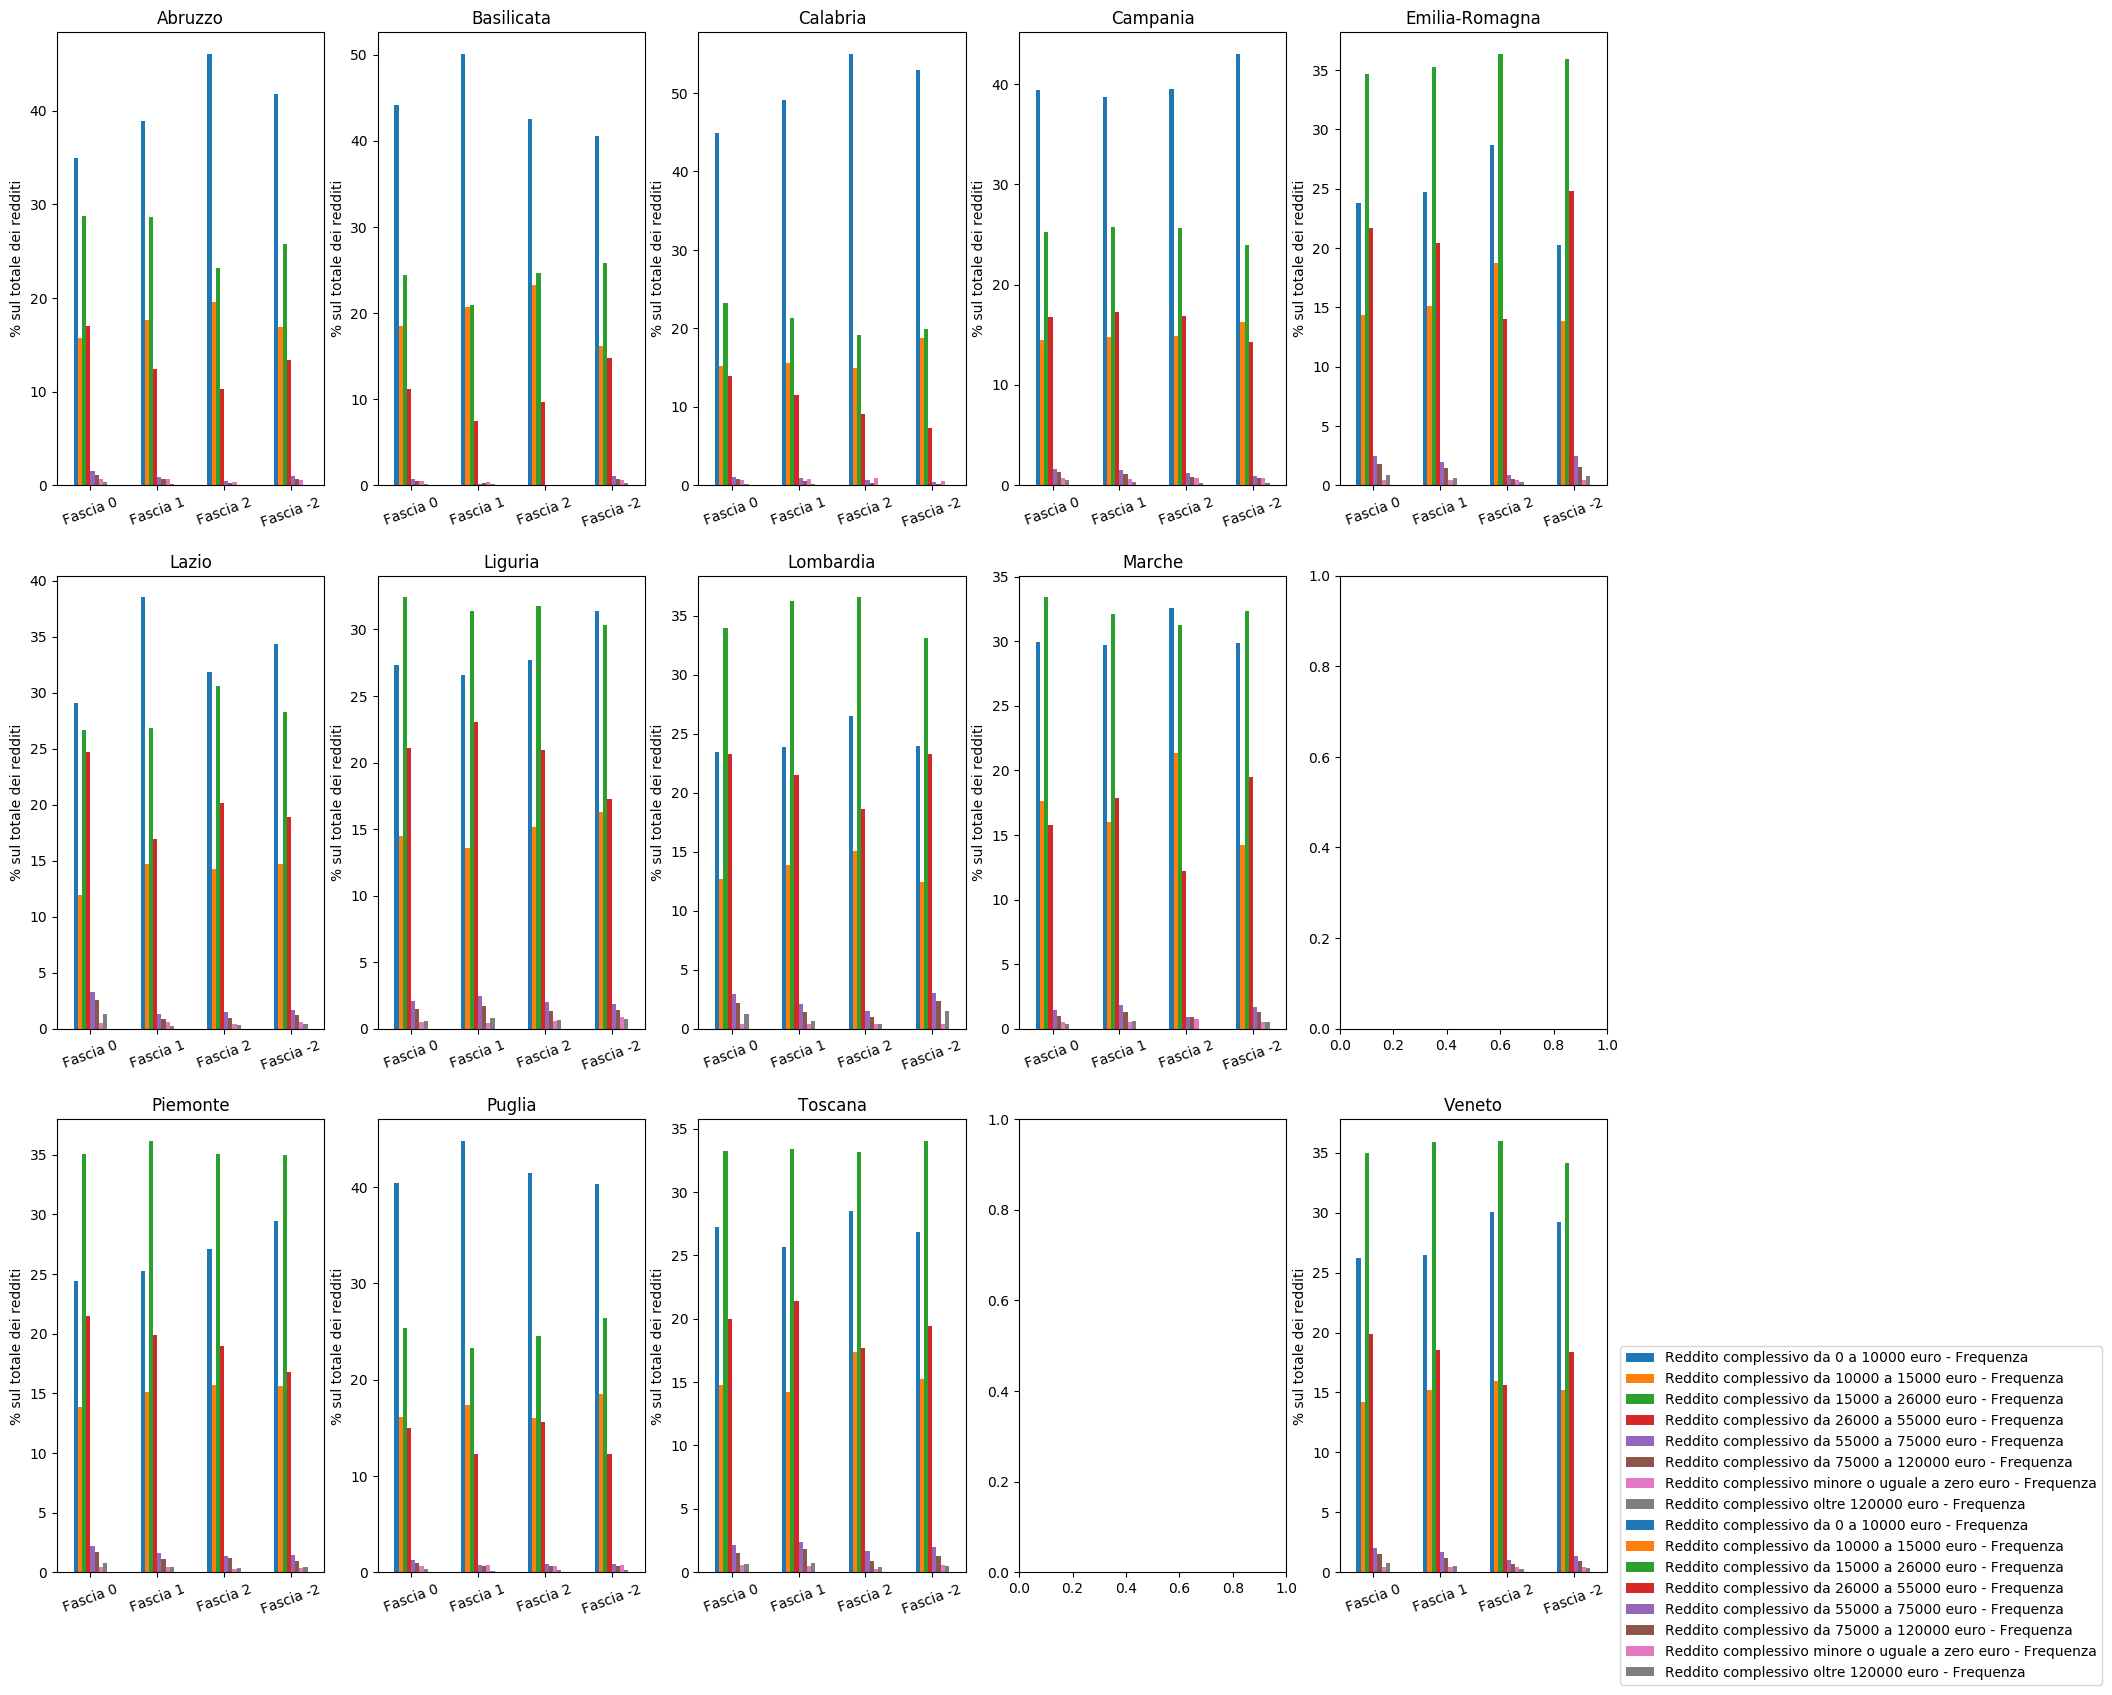

In [162]:
def buckets(i):
    return list(df['LQP_COD_1'].groupby(df['Regione_x']))[i][0]

num_plots = len(df['LQP_COD_1'].groupby(df['Regione_x']).describe())
fig, axes = plt.subplots(3,5,figsize=(20,20))

for i,r in enumerate(regioni):
    try:
        fascia_0 = dictionary_fasce['fascia_0'].loc[r]
    except: continue
    
    try:
        fascia_1 = dictionary_fasce['fascia_1'].loc[r]
    except: continue
    
    try:
        fascia_2 = dictionary_fasce['fascia_2'].loc[r]
    except:continue
        
    try:
        fascia_meno_2 = dictionary_fasce['fascia_meno_2'].loc[r]
    except:continue
    
    df_to_plot = pd.DataFrame([fascia_0,fascia_1,fascia_2,fascia_meno_2])
    df_to_plot.index = ['Fascia 0', 'Fascia 1', 'Fascia 2', 'Fascia -2']
    
    row = i // 5
    col = i % 5
    ax_curr = axes[row, col]
    
    df_to_plot.plot.bar(legend=False, ax=ax_curr)#.legend(bbox_to_anchor=(1.05, 0), loc='best', borderaxespad=0.)
    #ax_curr.tick_params(axis='x', labelrotation=45)
    
    for tick in ax_curr.get_xticklabels():
        tick.set_rotation(20)
    #sns.distplot(np.array(distribuzione_regione), ax=ax_curr)
    ax_curr.set_title(buckets(i))
    ax_curr.set_ylabel('% sul totale dei redditi')
    
df_to_plot.plot.bar(legend=False, ax=ax_curr).legend(bbox_to_anchor=(1.05, 0.5), loc='best', borderaxespad=0.)
plt.xticks(rotation = 20)

Una considerazione generale che può essere fatta è che il grafico mostra che per le regioni del Centro/Nord, come `Emilia-Romagna`, `Liguria`, `Lombardia`, `Piemonte`, `Toscana` e `Veneto`, la fascia di reddito in cui i cittadini si trovano è quella tra i 15 e 26 mila euro l'anno.


In termini di `differenza spesa storica fabbisogni standard`, si nota che nel complesso la distribuzione dei redditi rispetto alle fasce di differenza, rimane la stessa al variare della classe.

Le uniche regioni dove si osserva una variazione particolare sono  l'`Abruzzo`:
* Che vede l'aumento di persone con reddito basso quando la differenza spesa/fabbisogno aumenta.

Lo stesso avviene per la Calabria.


Costruiamo lo stesso grafico utilizzando la differenza tra servizi offerti/storici con servizi standard. Nel caso in cui anche in questo caso non osserveremo differenze sostanziali tra le fasce, potremo dire che la situazione è positiva in quanto la quantità di servizi offerti, in termini di viabilità, dai comuni italiani, non sembra essere dipendente dalla classe complessiva di reddito del comune.

In [163]:
# Redditi e tasse
df['Reddito totale frequenze'] = df['Reddito complessivo da 0 a 10000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 10000 a 15000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 15000 a 26000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 26000 a 55000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 55000 a 75000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 75000 a 120000 euro - Frequenza'].fillna(0) + df['Reddito complessivo minore o uguale a zero euro - Frequenza'].fillna(0) + df['Reddito complessivo oltre 120000 euro - Frequenza'].fillna(0) 

# Aggiustare i dati per i plot
fasce = ['fascia_0','fascia_1', 'fascia_2', 'fascia_meno_1', 'fascia_meno_2']

dictionary_fasce = {}
for f in fasce: 
    df_fascia_0 = df[df['scaglioni_servizi'] == f]

    # Ottenere totale frequenze redditi nelle varie regioni
    totale_fascia = df_fascia_0[['Reddito totale frequenze', 'Regione_x']].groupby('Regione_x').sum()['Reddito totale frequenze']

    # Ottenere frequenze sulle diverse fasce di reddito nelle diverse regioni
    redditi_regioni = df_fascia_0[['Reddito complessivo da 0 a 10000 euro - Frequenza', 'Reddito complessivo da 10000 a 15000 euro - Frequenza','Reddito complessivo da 15000 a 26000 euro - Frequenza','Reddito complessivo da 26000 a 55000 euro - Frequenza','Reddito complessivo da 55000 a 75000 euro - Frequenza','Reddito complessivo da 75000 a 120000 euro - Frequenza', 'Reddito complessivo minore o uguale a zero euro - Frequenza', 'Reddito complessivo oltre 120000 euro - Frequenza', 'Regione_x']].groupby('Regione_x').sum()#.describe()

    # Matrice di dati da plottare
    to_plot = redditi_regioni.div(totale_fascia, axis=0)*100
    
    dictionary_fasce[f] = to_plot

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

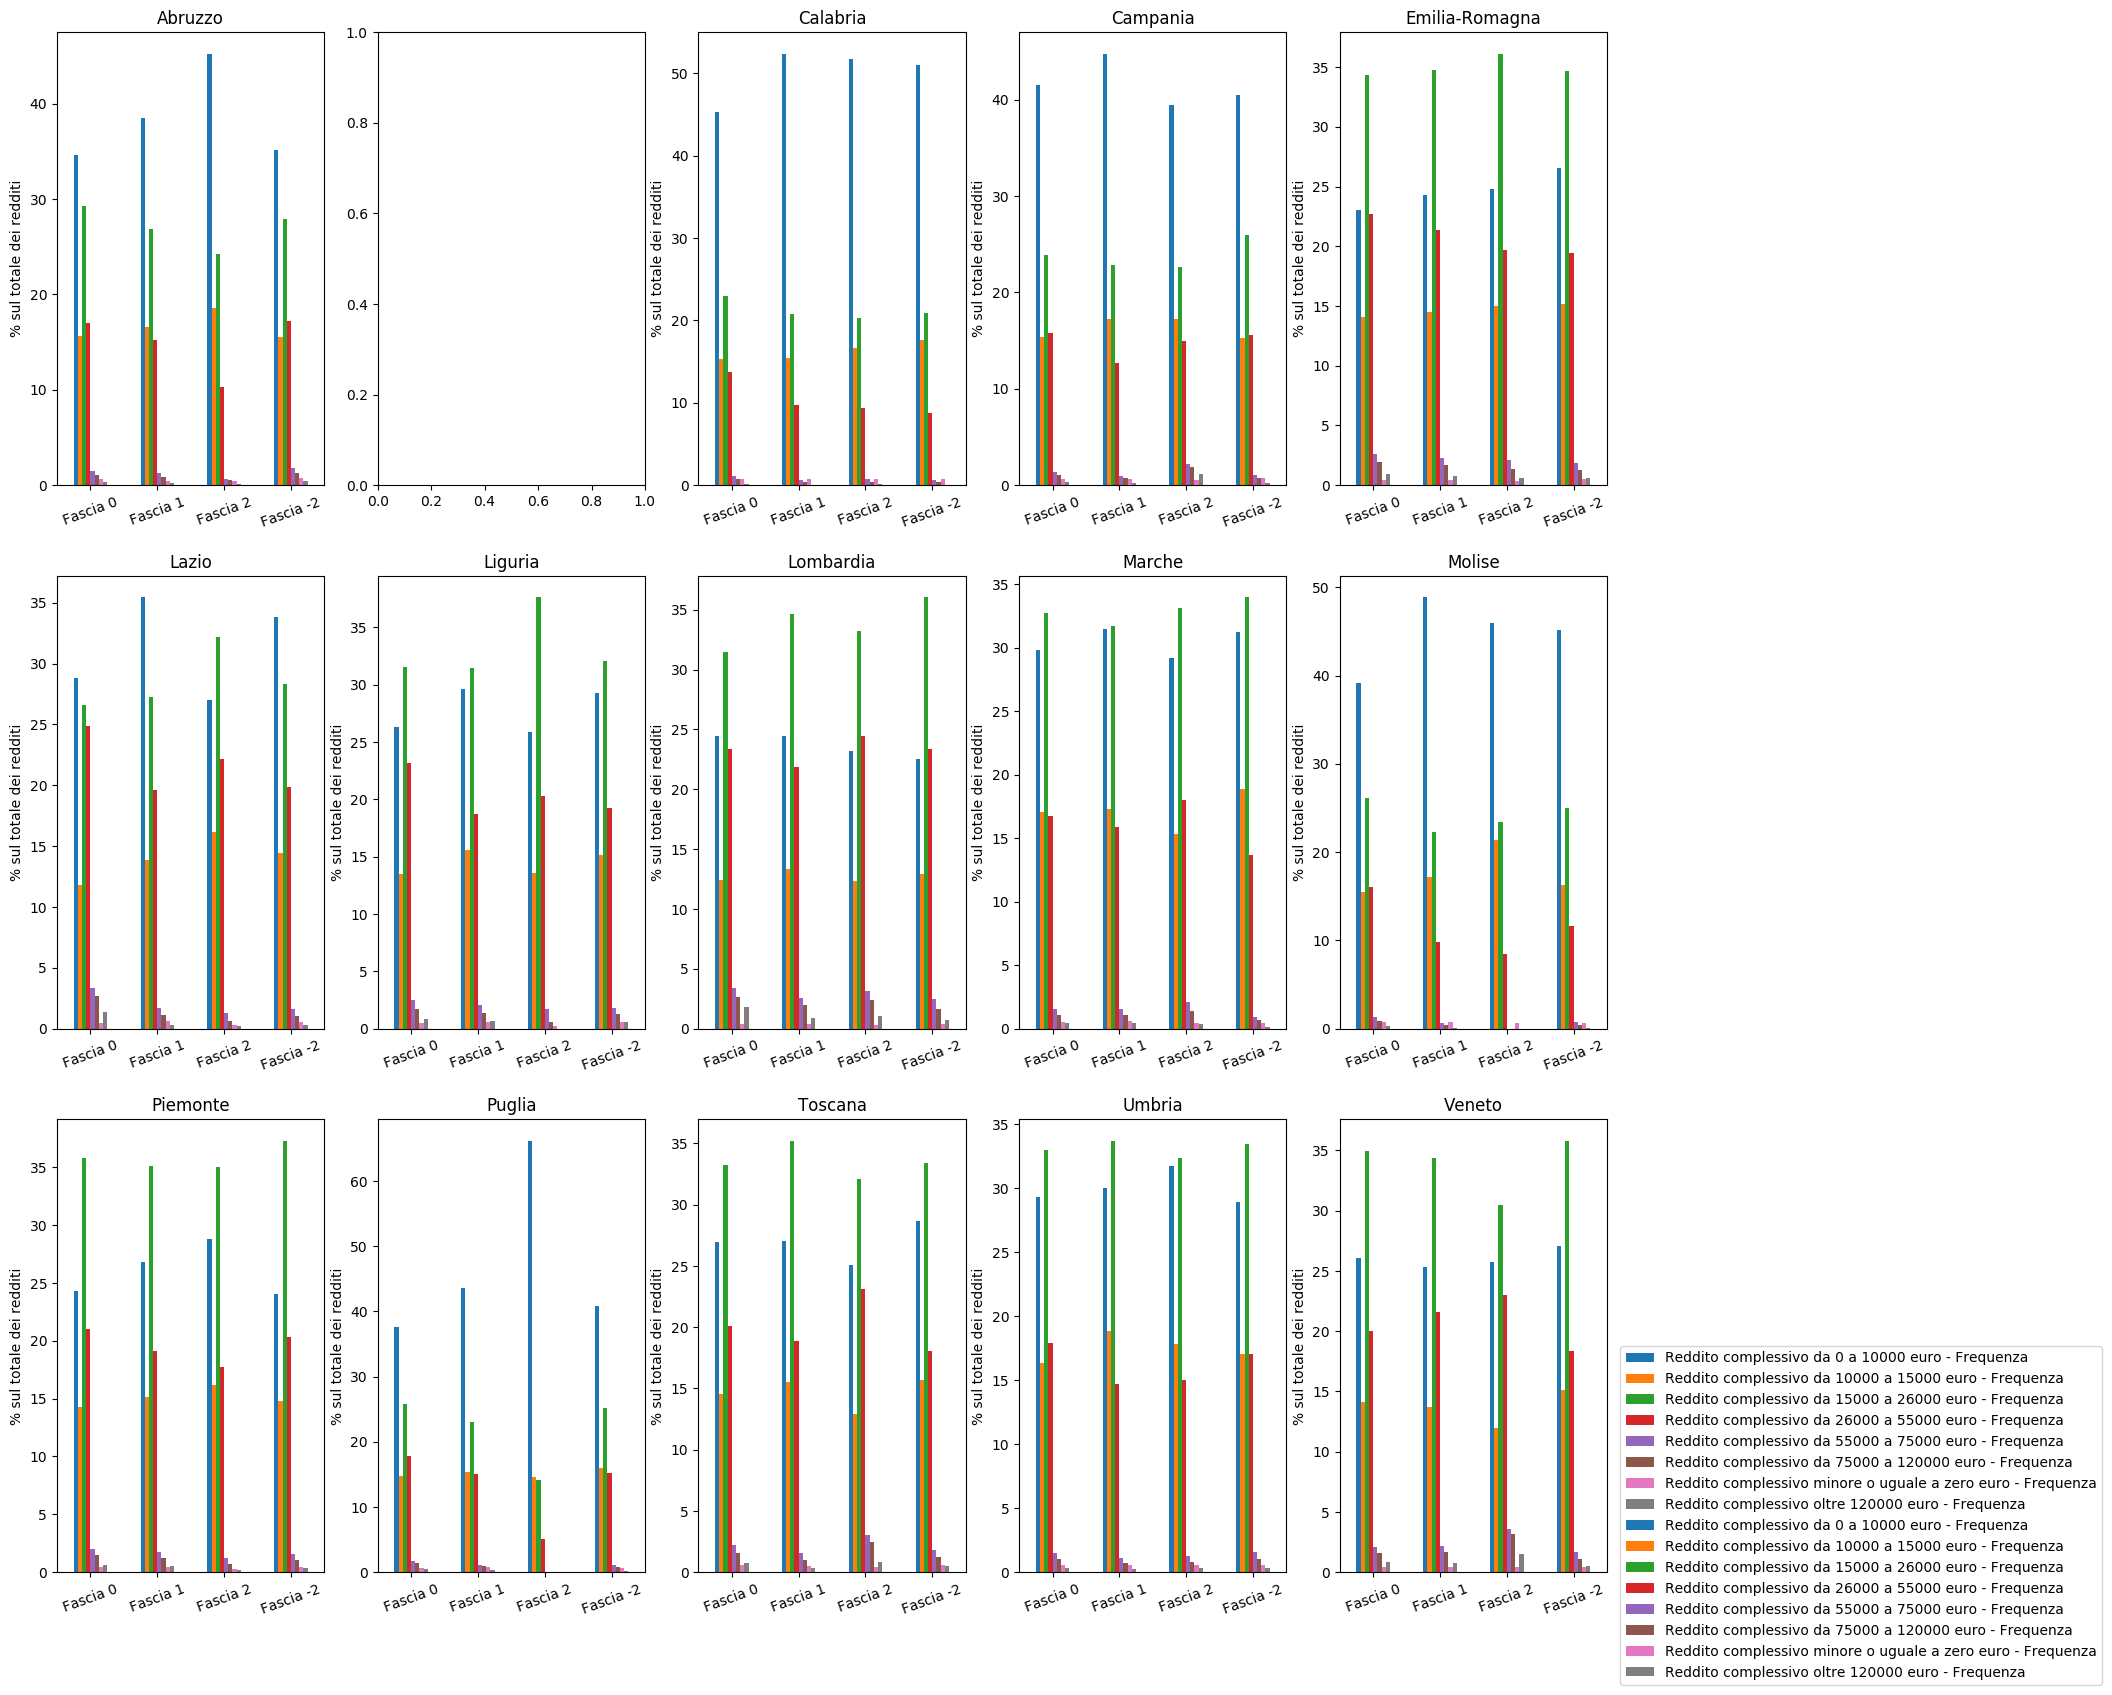

In [164]:
def buckets(i):
    return list(df['LQP_COD_1'].groupby(df['Regione_x']))[i][0]

num_plots = len(df['LQP_COD_1'].groupby(df['Regione_x']).describe())
fig, axes = plt.subplots(3,5,figsize=(20,20))

for i,r in enumerate(regioni):
    try:
        fascia_0 = dictionary_fasce['fascia_0'].loc[r]
    except: continue
    
    try:
        fascia_1 = dictionary_fasce['fascia_1'].loc[r]
    except: continue
    
    try:
        fascia_2 = dictionary_fasce['fascia_2'].loc[r]
    except:continue
        
    try:
        fascia_meno_2 = dictionary_fasce['fascia_meno_2'].loc[r]
    except:continue
        
    df_to_plot = pd.DataFrame([fascia_0,fascia_1,fascia_2,fascia_meno_2])
    df_to_plot.index = ['Fascia 0', 'Fascia 1', 'Fascia 2', 'Fascia -2']
    
    row = i // 5
    col = i % 5
    ax_curr = axes[row, col]
    
    df_to_plot.plot.bar(legend=False, ax=ax_curr)#.legend(bbox_to_anchor=(1.05, 0), loc='best', borderaxespad=0.)
    #ax_curr.tick_params(axis='x', labelrotation=45)
    
    for tick in ax_curr.get_xticklabels():
        tick.set_rotation(20)
    #sns.distplot(np.array(distribuzione_regione), ax=ax_curr)
    ax_curr.set_title(buckets(i))
    ax_curr.set_ylabel('% sul totale dei redditi')
    
df_to_plot.plot.bar(legend=False, ax=ax_curr).legend(bbox_to_anchor=(1.05, 0.5), loc='best', borderaxespad=0.)
plt.xticks(rotation = 20)

Anche in questo caso non si notano cambiamenti sostanziali tra le fasce. Sottolineamo però che in alcune regioni come: `Lazio`, `Pugli`, `Umbria` le fasce con maggiori servizi offerti/storici rispetto i servizi standard, hanno una percentuale più alta di persone appartenenti alle fasce di reddito più basso.

In [165]:
df__2013 = df

## 3. Confronto anni 2010-2013 <a name="vs"></a>

In questa parte finale controntiamo i risultati ottenuti per l'anno 2010 e 2013.

### 3.1. Confronto top e bottom spesa pro-capite <a name='vs3.1'></a>

Confrontiamo la distribuzione della spesa pro-capite a distanza di tre anni. Come vediamo nel [2010](#procapite2010) la spesa media era intorno ai 50 euro. Aumenta fino a 60 nel [2013](#procapite2013). In più, il massimo della spesa pro-capite, non considerando gli outlier si è alzato a 135 euro.

### 3.2. Confronto differenza percentuale tra spesa storica e fabbisogno standard <a name='vs3.2'></a>


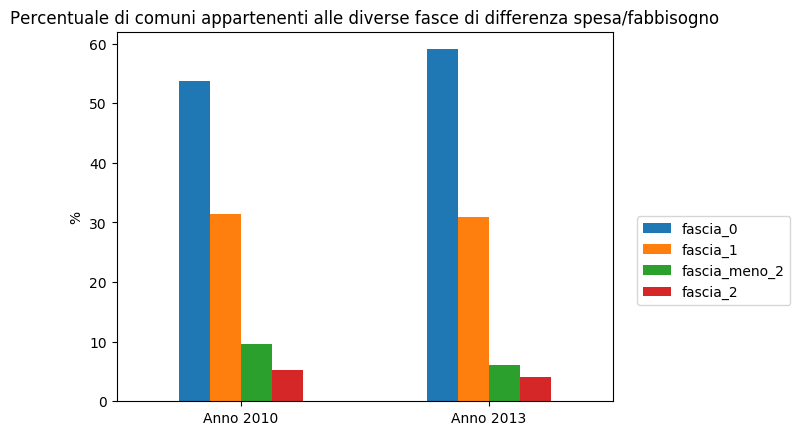

In [53]:
pp = pd.DataFrame([df_20100,df_2013])
pp.index = ['Anno 2010', 'Anno 2013']

pp.plot.bar().legend(bbox_to_anchor=(1.05, 0.5), loc='best', borderaxespad=0.)
plt.xticks(rotation=0)
plt.title('Percentuale di comuni appartenenti alle diverse fasce di differenza spesa/fabbisogno')
plt.ylabel('%')

Rispetto al 2010, nel 2013 si osserva un aumento dei comuni "in equilibrio", per quanto riguarda spesa e fabbisogni, a discapito della porzione di comuni che registra una spesa/fabbisogno di molto superiore al fabbisogno/spesa.

### 3.3. Confronto differenza spesa e fabbisogno a confronto con la differenza tra servizi offerti e servizi standard <a name='vs3.3'></a>

* Per quanto riguarda i comuni dove, la spesa è maggiore del fabbisogno ed i servizi offerti sono inferiori dei servizi standard, nel [2010](#confronto.3_10) le percentuali dei comuni, divise per regione, erano inferiori. Si è quindi verificato un encremento del numero di comuni con queste caratteristiche nel giro di 3 anni ([2013](#confronto.3)).
 
 
* Invece, la percentuale di comuni "in equilibrio" sia tra spesa/fabbisogno che tra servizi offerti/standard, nel   [2010](#confronto.3_10_) era superiore a quella registrata nel [2013](#confronto.3_).

### 3.4. Confronto Caratteristiche di reddito dei comuni appartenenti a diverse fasce <a name='vs3.4'></a>

Si decide di controntare gli anni 2010-2013 in termini di caratteristiche di reddito dei comuni appartenenti a diverse fasce. In particolare si definisce la variabile `Reddito per abitante` quella ottenuta dividento l'ammontare di reddito totale del comune per il numero di persone che dichiarano il proprio reddito (somma delle frequenze sulle differenti fasce di reddito).

In [201]:
df__2010['Reddito totale frequenze'] = df__2010['Reddito complessivo da 0 a 10000 euro - Frequenza'].fillna(0) + df__2010['Reddito complessivo da 10000 a 15000 euro - Frequenza'].fillna(0) + df__2010['Reddito complessivo da 15000 a 26000 euro - Frequenza'].fillna(0) + df__2010['Reddito complessivo da 26000 a 55000 euro - Frequenza'].fillna(0) + df__2010['Reddito complessivo da 55000 a 75000 euro - Frequenza'].fillna(0) + df__2010['Reddito complessivo da 75000 a 120000 euro - Frequenza'].fillna(0) + df__2010['Reddito complessivo minore o uguale a zero euro - Frequenza'].fillna(0) + df__2010['Reddito complessivo oltre 120000 euro - Frequenza'].fillna(0) 
df__2010['Reddito totale ammontare'] = df__2010['Reddito complessivo da 0 a 10000 euro - Ammontare'].fillna(0) + df__2010['Reddito complessivo da 10000 a 15000 euro - Ammontare'].fillna(0) + df__2010['Reddito complessivo da 15000 a 26000 euro - Ammontare'].fillna(0) + df__2010['Reddito complessivo da 26000 a 55000 euro - Ammontare'].fillna(0) + df__2010['Reddito complessivo da 55000 a 75000 euro - Ammontare'].fillna(0) + df__2010['Reddito complessivo da 75000 a 120000 euro - Ammontare'].fillna(0) + df__2010['Reddito complessivo minore o uguale a zero euro - Ammontare'].fillna(0) + df__2010['Reddito complessivo oltre 120000 euro - Ammontare'].fillna(0) 

# Definire il reddito per abitante
df__2010['Reddito per abitante'] = df__2010['Reddito totale ammontare']/df__2010['Reddito totale frequenze']
df__2010[['Reddito per abitante', 'Regione_x', 'fasce']].groupby('fasce').describe()

Reddito per abitante                                          \
                             count          mean          std          min   
fasce                                                                        
fascia_0                    2786.0  16888.537691  3706.526737  6434.908397   
fascia_1                    1624.0  17105.319258  3579.538160  7336.933962   
fascia_2                     269.0  16592.696351  3284.081935  9001.514019   
fascia_meno_2                494.0  15332.136256  3722.047147  6963.480000   

                                                                       
                        25%           50%           75%           max  
fasce                                                                  
fascia_0       14412.486740  16950.931256  19248.035889  63894.672779  
fascia_1       14768.005665  17145.185094  19309.489367  47158.453410  
fascia_2       14258.031171  16642.101360  18853.005197  27654.928421  
fascia_meno_2  12268.933198  15176.672661  18059.596436  32394.225150

Osserviamo che dispetto alla fascia di equilibrio (`fascia 0`), i comuni che hanno una spesa storica maggiore del fabbisogno standard hanno un reddito medio più elevato.

Al contrario risulta essere in media più basso, rispetto alla fascia di equilibrio, il reddito medio dei comuni la cui spesa storica è nettamente inferiore ai fabbisogni standard.


Per posse a confronto i due anni ripetiamo lo stesso per l'anno 2013.

In [202]:
df__2013['Reddito totale frequenze'] = df__2013['Reddito complessivo da 0 a 10000 euro - Frequenza'].fillna(0) + df__2013['Reddito complessivo da 10000 a 15000 euro - Frequenza'].fillna(0) + df__2013['Reddito complessivo da 15000 a 26000 euro - Frequenza'].fillna(0) + df__2013['Reddito complessivo da 26000 a 55000 euro - Frequenza'].fillna(0) + df__2013['Reddito complessivo da 55000 a 75000 euro - Frequenza'].fillna(0) + df__2013['Reddito complessivo da 75000 a 120000 euro - Frequenza'].fillna(0) + df__2013['Reddito complessivo minore o uguale a zero euro - Frequenza'].fillna(0) + df__2013['Reddito complessivo oltre 120000 euro - Frequenza'].fillna(0) 
df__2013['Reddito totale ammontare'] = df__2013['Reddito complessivo da 0 a 10000 euro - Ammontare'].fillna(0) + df__2013['Reddito complessivo da 10000 a 15000 euro - Ammontare'].fillna(0) + df__2013['Reddito complessivo da 15000 a 26000 euro - Ammontare'].fillna(0) + df__2013['Reddito complessivo da 26000 a 55000 euro - Ammontare'].fillna(0) + df__2013['Reddito complessivo da 55000 a 75000 euro - Ammontare'].fillna(0) + df__2013['Reddito complessivo da 75000 a 120000 euro - Ammontare'].fillna(0) + df__2013['Reddito complessivo minore o uguale a zero euro - Ammontare'].fillna(0) + df__2013['Reddito complessivo oltre 120000 euro - Ammontare'].fillna(0) 


# Definire il reddito per abitante
df__2013['Reddito per abitante'] = df__2013['Reddito totale ammontare']/df__2013['Reddito totale frequenze']
df__2013[['Reddito per abitante', 'Regione_x', 'fasce']].groupby('fasce').describe()

Reddito per abitante                                          \
                             count          mean          std          min   
fasce                                                                        
fascia_0                    2686.0  18032.813588  3786.769900  7657.448718   
fascia_1                    1398.0  17691.272820  3510.220656  6621.094828   
fascia_2                     180.0  17022.343185  3390.027081  8767.801223   
fascia_meno_2                277.0  15709.647927  4327.508961  8855.677239   

                                                                       
                        25%           50%           75%           max  
fasce                                                                  
fascia_0       15458.386625  18278.123420  20641.294447  38399.582351  
fascia_1       15364.188201  17819.510764  20028.885507  34047.083155  
fascia_2       14805.925986  16910.257577  19387.974829  29680.088050  
fascia_meno_2  12248.788473  15145.961318  18603.088656  45770.587963

Rispetto all'anno 2013:
* Il reddito medio descresce quando la differenza tra spesa e fabbisogno aumenta a favore della spesa.

* Il reddito medio, inoltre, diminuisce di circa 3mila euro quando il fabbisogno è maggiore della spesa.